In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pip
pip.main(["install", "openpyxl"])

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

mpl.rcParams["font.size"] = 12
mpl.rcParams['figure.figsize'] = [8,6]

bronx = pd.read_excel('D:/Python/lab2/data_rollingsales/bronx.xlsx', skiprows=4)
brooklyn = pd.read_excel('D:/Python/lab2/data_rollingsales/brooklyn.xlsx', skiprows=4)
manhattan = pd.read_excel('D:/Python/lab2/data_rollingsales/manhattan.xlsx', skiprows=4)
queens = pd.read_excel('D:/Python/lab2/data_rollingsales/queens.xlsx', skiprows=4)
statenisland = pd.read_excel('D:/Python/lab2/data_rollingsales/statenisland.xlsx', skiprows=4)
df = pd.concat([bronx, brooklyn, manhattan, queens, statenisland], ignore_index=True)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: openpyxl in c:\users\legion\appdata\local\programs\python\python310\lib\site-packages (3.1.2)

Requirement already satisfied: et-xmlfile in c:\users\legion\appdata\local\programs\python\python310\lib\site-packages (from openpyxl) (1.1.0)

[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

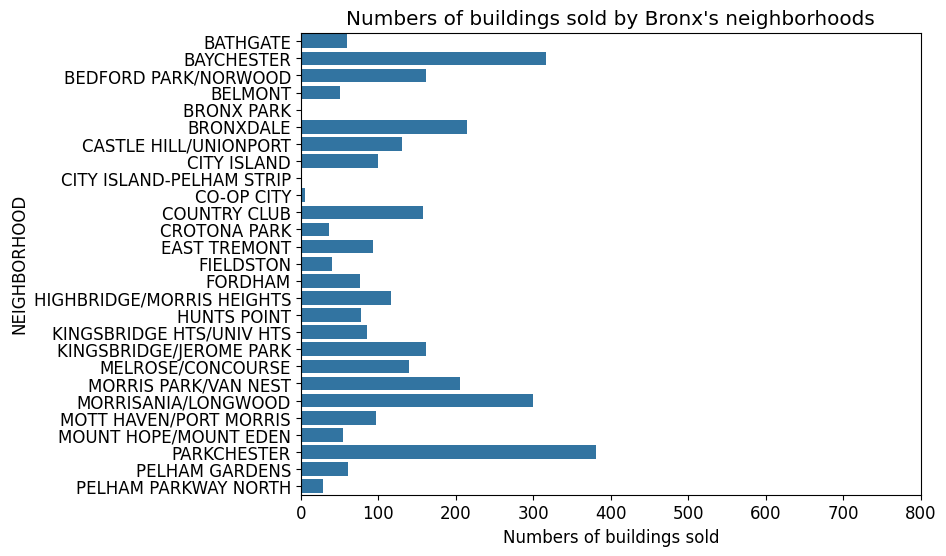

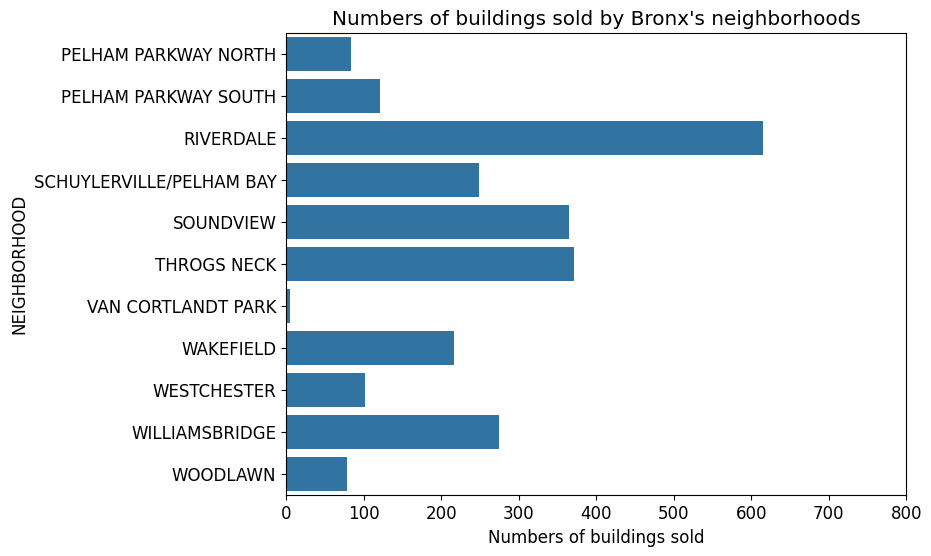

In [2]:


df.loc[df["EASEMENT"].isnull(), "EASEMENT"] = "Doesn't have an easement"
df.loc[df["EASEMENT"]=='', "EASEMENT"] = "Doesn't have an easement"
df.loc[df["EASEMENT"]==0, "EASEMENT"] = "Doesn't have an easement"
df.loc[df["APARTMENT NUMBER"].isnull(), "APARTMENT NUMBER"] = "Not an apartment"
df.loc[df["APARTMENT NUMBER"]=='', "APARTMENT NUMBER"] = "Not an apartment"
df.loc[df["APARTMENT NUMBER"]==0, "APARTMENT NUMBER"] = "Not an apartment"
df.loc[df["RESIDENTIAL UNITS"].isnull(), "RESIDENTIAL UNITS"] = "Doesn't have residential units"
df.loc[df["RESIDENTIAL UNITS"]=='', "RESIDENTIAL UNITS"] = "Doesn't have residential units"
df.loc[df["RESIDENTIAL UNITS"]==0, "RESIDENTIAL UNITS"] = "Doesn't have residential units"
df.loc[df["COMMERCIAL UNITS"].isnull(), "COMMERCIAL UNITS"] = "Doesn't have commercial units"
df.loc[df["COMMERCIAL UNITS"]=='', "COMMERCIAL UNITS"] = "Doesn't have commercial units"
df.loc[df["COMMERCIAL UNITS"]==0, "COMMERCIAL UNITS"] = "Doesn't have commercial units"
df.loc[df["TOTAL UNITS"].isnull(), "TOTAL UNITS"] = "Doesn't have total units"
df.loc[df["TOTAL UNITS"]=='', "TOTAL UNITS"] = "Doesn't have total units"
df.loc[df["TOTAL UNITS"]==0, "TOTAL UNITS"] = "Doesn't have total units"
df.loc[df["LAND SQUARE FEET"].isnull(), "LAND SQUARE FEET"] = "Land square feet is unknown"
df.loc[df["LAND SQUARE FEET"]=='', "LAND SQUARE FEET"] = "Land square feet is unknown"
df.loc[df["LAND SQUARE FEET"]==0, "LAND SQUARE FEET"] = "Land square feet is unknown"
df.loc[df["GROSS SQUARE FEET"].isnull(), "GROSS SQUARE FEET"] = "Gross square feet is unknown"
df.loc[df["GROSS SQUARE FEET"]=='', "GROSS SQUARE FEET"] = "Gross square feet is unknown"
df.loc[df["GROSS SQUARE FEET"]==0, "GROSS SQUARE FEET"] = "Gross square feet is unknown"
df.loc[df["BUILDING CLASS AT PRESENT"].isnull(), "BUILDING CLASS AT PRESENT"] = "Building class is unknown"
df.loc[df["BUILDING CLASS AT PRESENT"]=='', "BUILDING CLASS AT PRESENT"] = "Building class is unknown"
df.loc[df["BUILDING CLASS AT PRESENT"]==0, "BUILDING CLASS AT PRESENT"] = "Building class is unknown"
df.loc[df["BOROUGH"] == 2, "BOROUGH"] = "Bronx"
df.loc[df["BOROUGH"] == 4, "BOROUGH"] = "Queens"
df.loc[df["BOROUGH"] == 3, "BOROUGH"] = "Brooklyn"
df.loc[df["BOROUGH"] == 1, "BOROUGH"] = "Manhattan"
df.loc[df["BOROUGH"] == 5, "BOROUGH"] = "Staten Island"

df.loc[df["YEAR BUILT"].isnull(), "YEAR BUILT"] = '111111'
df.loc[df["YEAR BUILT"]=='', "YEAR BUILT"] = '111111'
df.loc[df["YEAR BUILT"]=='YEAR BUILT', "YEAR BUILT"] = '111111'
df['YEAR BUILT'] = df['YEAR BUILT'].map(int)
# create a list of our conditions
conditions = [
    (df['YEAR BUILT'] == 111111),
    (df['YEAR BUILT'] < 1900),
    (df['YEAR BUILT'] >= 1900) & (df['YEAR BUILT'] <= 1920),
    (df['YEAR BUILT'] >= 1921) & (df['YEAR BUILT'] <= 1940),
    (df['YEAR BUILT'] >= 1941) & (df['YEAR BUILT'] <= 1960),
    (df['YEAR BUILT'] >= 1961) & (df['YEAR BUILT'] <= 1980),
    (df['YEAR BUILT'] >= 1981) & (df['YEAR BUILT'] <= 2000),
    (df['YEAR BUILT'] >= 2001)
    ]
# create a list of the values we want to assign for each condition
values = ['Year unknown', '1900-', '1900-1920', '1921-1940', '1941-1960', '1961-1980', '1981-2000', '2001+']

# create a new column and use np.select to assign values to it using our lists as arguments
df['TIME PERIOD'] = np.select(conditions, values)
#bronx
dfBronx = df.loc[df["BOROUGH"]=='Bronx']
dfBronxFirstHalf = dfBronx.head(3157).reset_index()
dfBronxSecondHalf = dfBronx.tail(len(dfBronx) - 3157).reset_index()
dfBronxNeighborhoodsSize = dfBronxFirstHalf.groupby('NEIGHBORHOOD').size().reset_index(name = 'Numbers of buildings sold')
dfBronxNeighborhoodsSize =  sns.barplot(x='Numbers of buildings sold', y= 'NEIGHBORHOOD', data=dfBronxNeighborhoodsSize)
dfBronxNeighborhoodsSize.set_xlim(0, 800)
dfBronxNeighborhoodsSize.set(title = 'Numbers of buildings sold by Bronx\'s neighborhoods')
plt.show()
dfBronxNeighborhoodsSize = dfBronxSecondHalf.groupby('NEIGHBORHOOD').size().reset_index(name = 'Numbers of buildings sold')
dfBronxNeighborhoodsSize =  sns.barplot(x='Numbers of buildings sold', y= 'NEIGHBORHOOD', data=dfBronxNeighborhoodsSize)
dfBronxNeighborhoodsSize.set_xlim(0, 800)
dfBronxNeighborhoodsSize.set(title = 'Numbers of buildings sold by Bronx\'s neighborhoods')
plt.show()



На цьому графіку бачимо Прівелегіювання у районі Рівердейл, що свідчить про його актуальність протягом всього часового проміжку

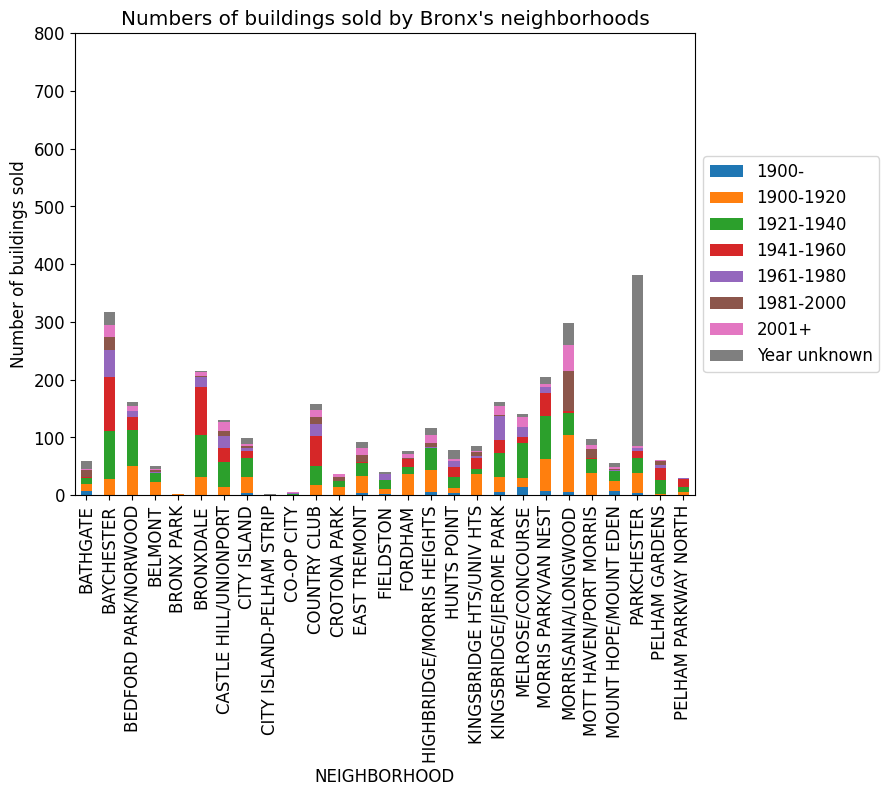

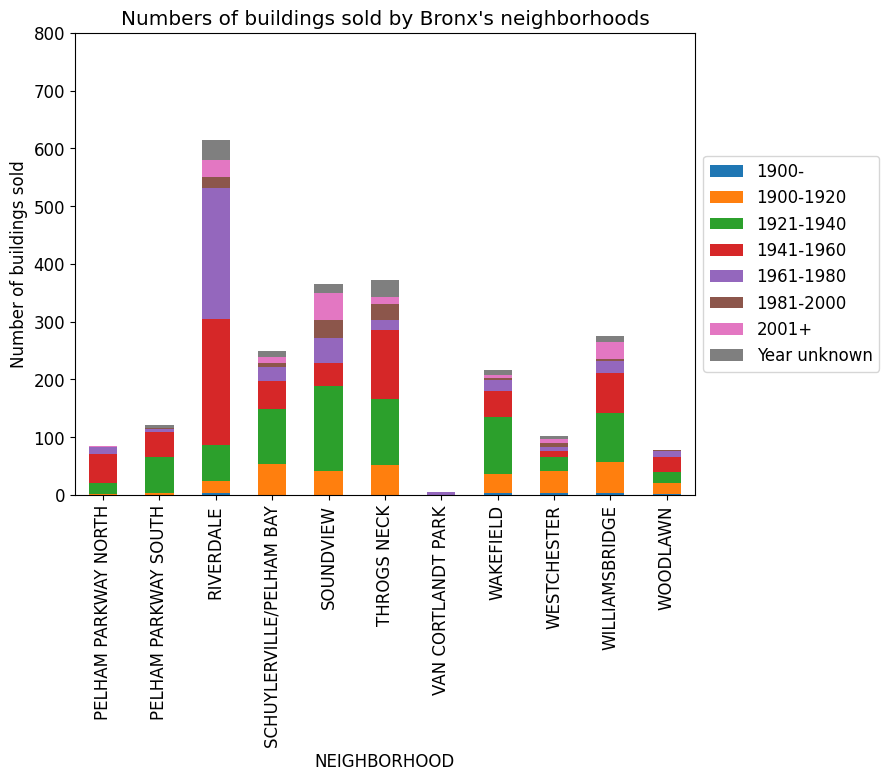

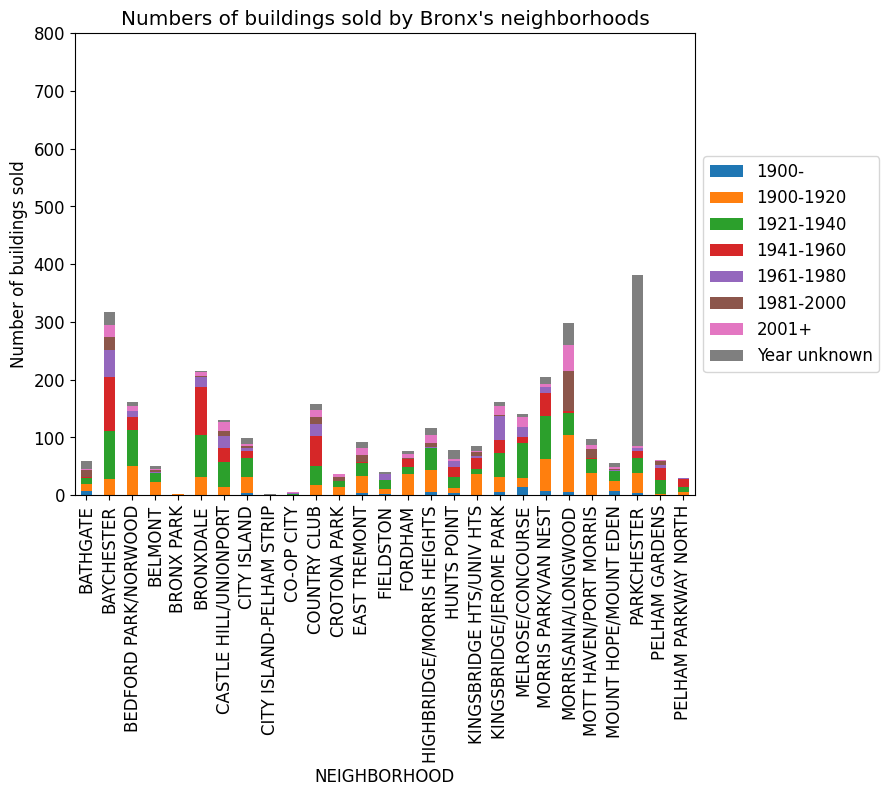

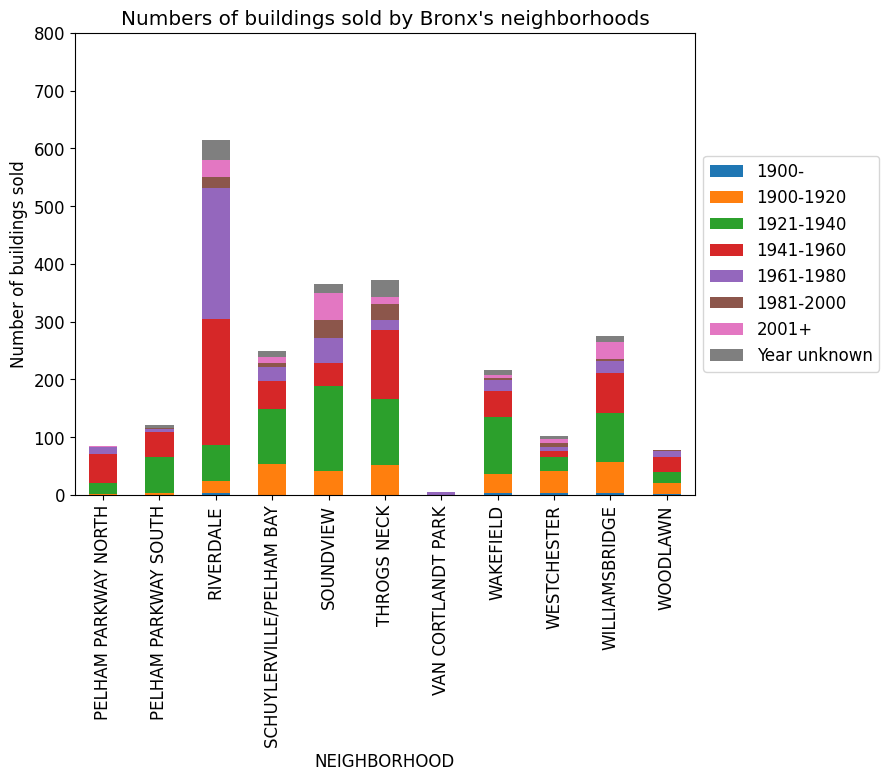

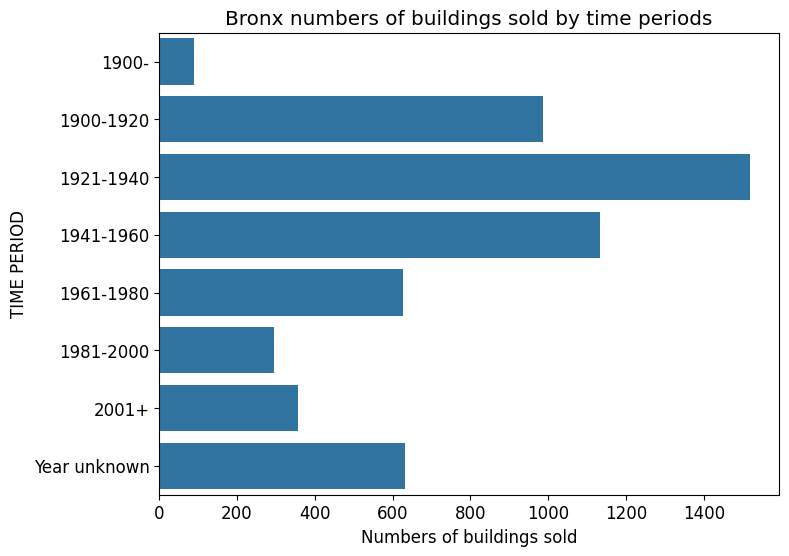

In [3]:
dfBronxNeighborhoodsSizeByTimePeriod = dfBronxFirstHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfBronxNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Bronx\'s neighborhoods')
plt.ylabel('Number of buildings sold')
dfBronxNeighborhoodsSizeByTimePeriod.set_ylim(0, 800)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
dfBronxNeighborhoodsSizeByTimePeriod = dfBronxSecondHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfBronxNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Bronx\'s neighborhoods')
dfBronxNeighborhoodsSizeByTimePeriod.set_ylim(0, 800)
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
dfBronxNeighborhoodsSizeByTimePeriod = dfBronxFirstHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfBronxNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Bronx\'s neighborhoods')
plt.ylabel('Number of buildings sold')
dfBronxNeighborhoodsSizeByTimePeriod.set_ylim(0, 800)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
dfBronxNeighborhoodsSizeByTimePeriod = dfBronxSecondHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfBronxNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Bronx\'s neighborhoods')
dfBronxNeighborhoodsSizeByTimePeriod.set_ylim(0, 800)
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
dfBronxNeighborhoodsTimePeriod = dfBronx.groupby('TIME PERIOD')['NEIGHBORHOOD'].size().reset_index(name = 'Numbers of buildings sold')
dfBronxNeighborhoodsTimePeriod =  sns.barplot(x='Numbers of buildings sold', y= 'TIME PERIOD', data=dfBronxNeighborhoodsTimePeriod)
dfBronxNeighborhoodsTimePeriod.set(title = 'Bronx numbers of buildings sold by time periods')
plt.show()


На графіку з додатковим показом періоду часу, коли нерухомість було побудована, бачимо, що більшість Рівердейлу була продана у період з 1941-1980 роки. Сьогодні більш привадливими виглядають райони Морісаніал/Лонґвуд та Саундв’ю, які з 2000 року по сьогодні продали більше нерухомості, ніж Рівердейл. 

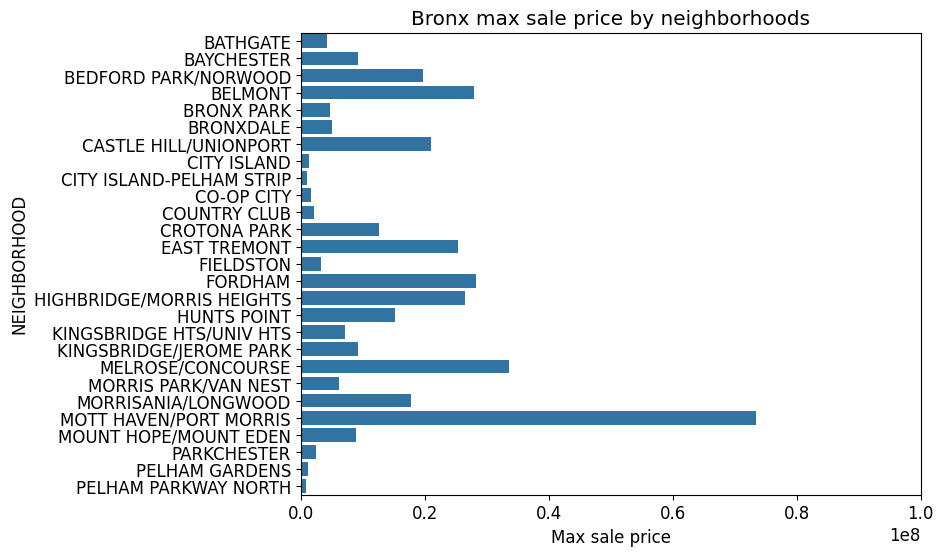

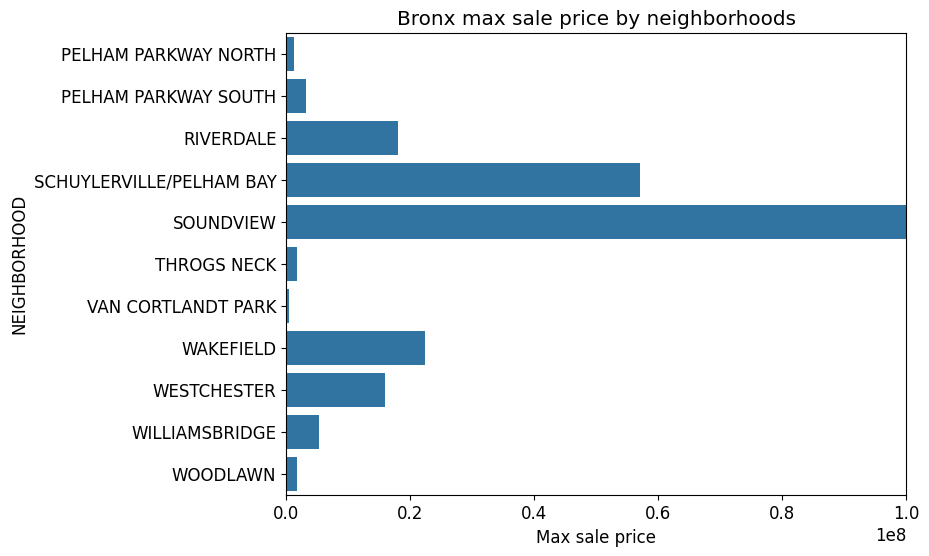

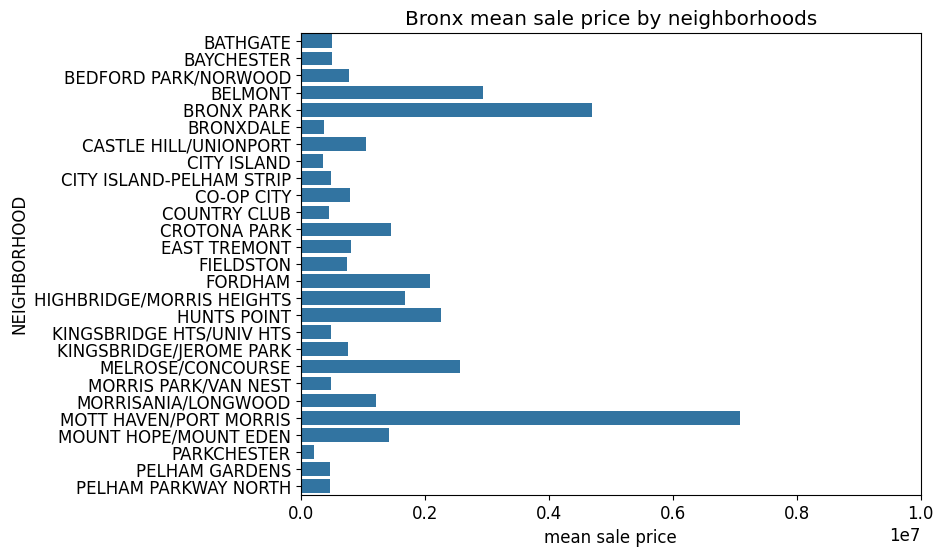

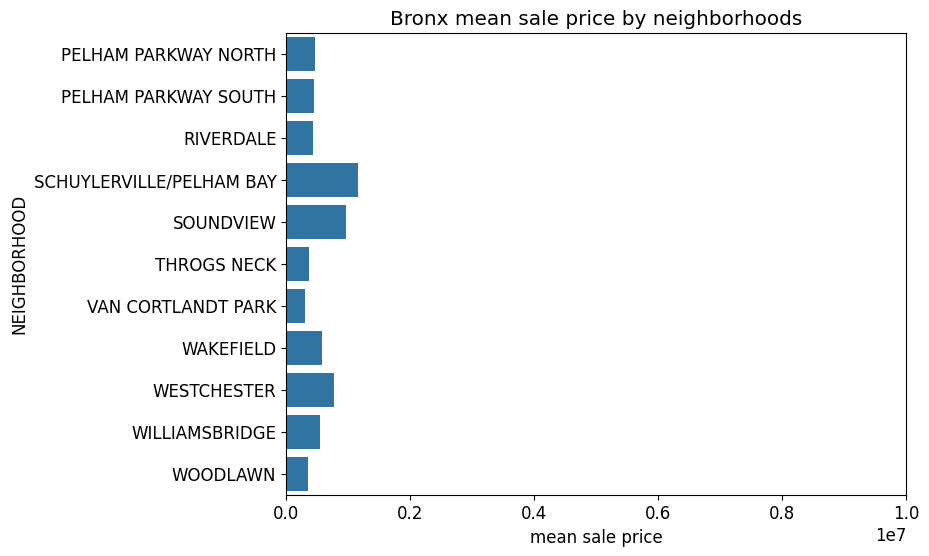

In [4]:
dfBronxNeighborhoodsMaxSalePrice = dfBronxFirstHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].max().reset_index(name = 'Max sale price')
dfBronxNeighborhoodsMaxSalePrice =  sns.barplot(x='Max sale price', y= 'NEIGHBORHOOD', data=dfBronxNeighborhoodsMaxSalePrice)
dfBronxNeighborhoodsMaxSalePrice.set(title = 'Bronx max sale price by neighborhoods')
dfBronxNeighborhoodsMaxSalePrice.set_xlim(0, 100000000)
plt.show()
dfBronxNeighborhoodsMaxSalePrice = dfBronxSecondHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].max().reset_index(name = 'Max sale price')
dfBronxNeighborhoodsMaxSalePrice =  sns.barplot(x='Max sale price', y= 'NEIGHBORHOOD', data=dfBronxNeighborhoodsMaxSalePrice)
dfBronxNeighborhoodsMaxSalePrice.set(title = 'Bronx max sale price by neighborhoods')
dfBronxNeighborhoodsMaxSalePrice.set_xlim(0, 100000000)
plt.show()

dfBronxNeighborhoodsMeanSalePrice = dfBronxFirstHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index(name = 'mean sale price')
dfBronxNeighborhoodsMeanSalePrice =  sns.barplot(x='mean sale price', y= 'NEIGHBORHOOD', data=dfBronxNeighborhoodsMeanSalePrice)
dfBronxNeighborhoodsMeanSalePrice.set(title = 'Bronx mean sale price by neighborhoods')
dfBronxNeighborhoodsMeanSalePrice.set_xlim(0, 10000000)
plt.show()
dfBronxNeighborhoodsMeanSalePrice = dfBronxSecondHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index(name = 'mean sale price')
dfBronxNeighborhoodsMeanSalePrice =  sns.barplot(x='mean sale price', y= 'NEIGHBORHOOD', data=dfBronxNeighborhoodsMeanSalePrice)
dfBronxNeighborhoodsMeanSalePrice.set(title = 'Bronx mean sale price by neighborhoods')
dfBronxNeighborhoodsMeanSalePrice.set_xlim(0, 10000000)
plt.show()


З аналізу графіків видно, що найвища ціна продажу була зафіксована в Саундв’ю (приблизно 100 мільйонів доларів). Однак згідно з другим графіком, середнє значення цін у Саундв’ю близьке до середнього значення інших районів (приблизно 0,4 мільйона доларів). Варто відзначити, що райони, такі як Бронкс Парк (близько 4,7 мільйонів доларів), Мот Хевен (близько 7 мільйонів доларів) та Белмонт (близько 4 мільйонів доларів), мають надзвичайно великі значення. З цього можна зробити висновок, що ці райони є привабливими для будівництва, оскільки нерухомість там має стабільно високі ціни.

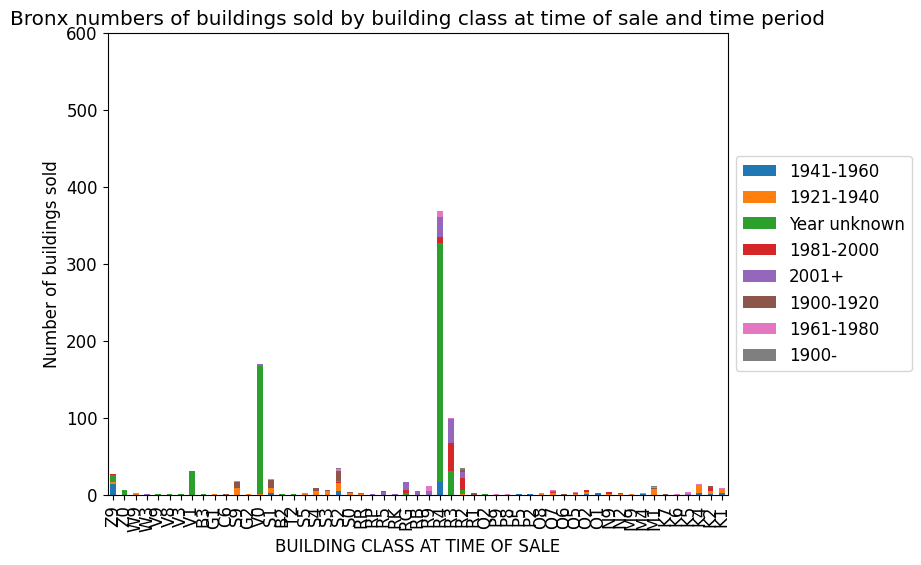

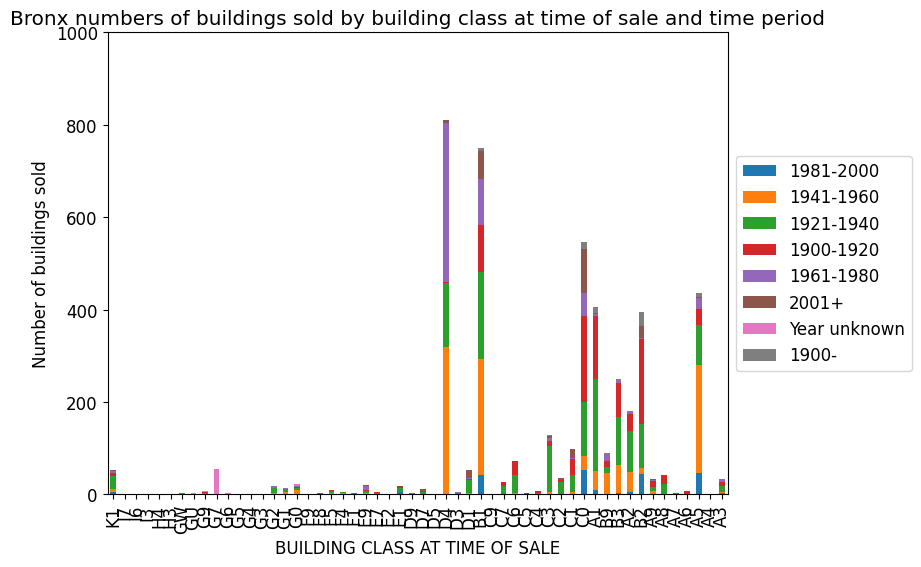

In [5]:
dfBronxSorted = dfBronx.sort_values(by = ['BUILDING CLASS AT PRESENT'], ascending=False)
dfBronxSortedFirstHalf = dfBronxSorted.head(966).reset_index()
dfBronxSortedSecondHalf = dfBronxSorted.tail(len(dfBronxSorted.index) - 966).reset_index()
dfBronxNeighborhoodsSizeByTimePeriod = dfBronxSortedFirstHalf.groupby(['BUILDING CLASS AT TIME OF SALE', 'TIME PERIOD'], sort = False).size().unstack().plot(kind='bar', stacked=True)
dfBronxNeighborhoodsSizeByTimePeriod.set(title = 'Bronx numbers of buildings sold by building class at time of sale and time period')
dfBronxNeighborhoodsSizeByTimePeriod.set_ylim(0, 600)
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
dfBronxNeighborhoodsSizeByTimePeriod = dfBronxSortedSecondHalf.groupby(['BUILDING CLASS AT TIME OF SALE', 'TIME PERIOD'], sort = False).size().unstack().plot(kind='bar', stacked=True)
dfBronxNeighborhoodsSizeByTimePeriod.set(title = 'Bronx numbers of buildings sold by building class at time of sale and time period')
dfBronxNeighborhoodsSizeByTimePeriod.set_ylim(0, 1000)
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

З графіка можна зробити висновок, що на сьогодні найвищий попит спостерігається на класи будівель B1, C0, R3, R4 та C1. Раніше D4 був надзвичайно популярним, але в даний момент він практично не продається.

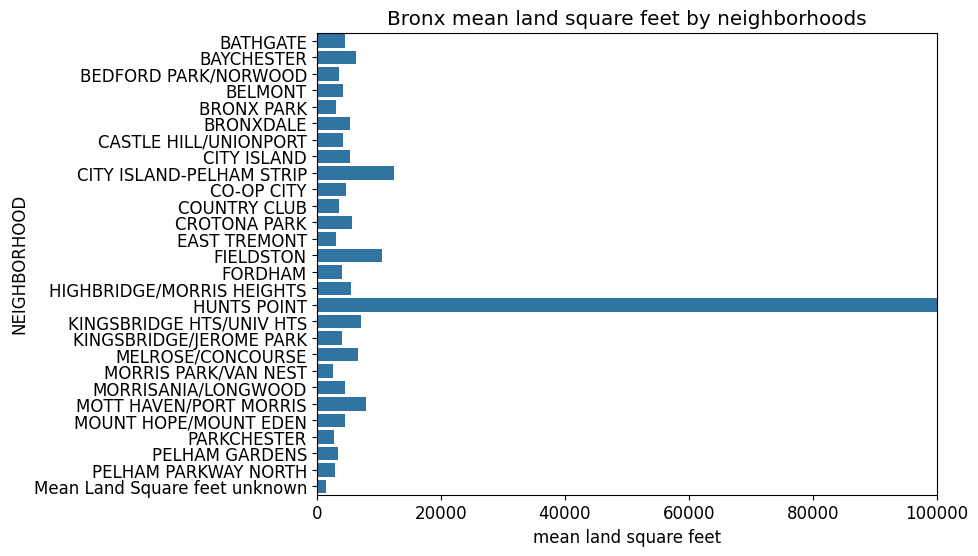

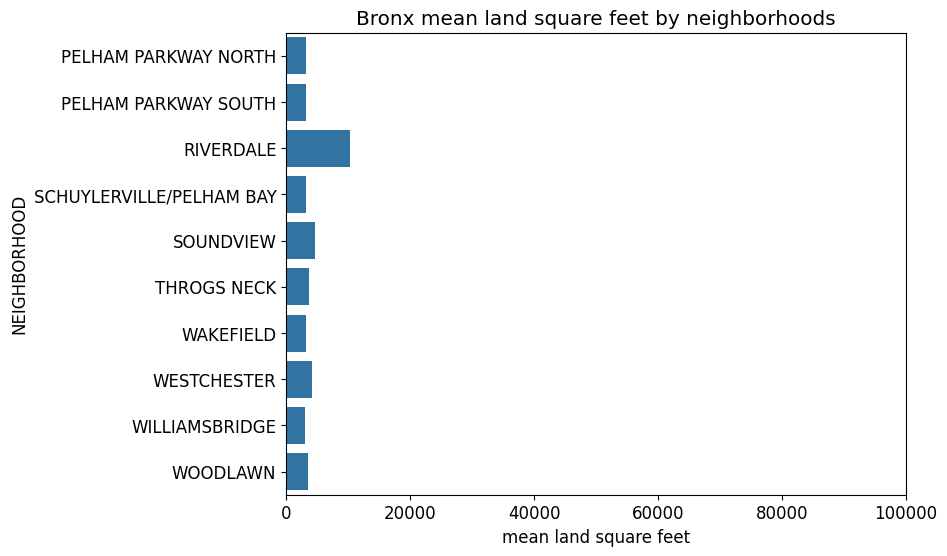

In [6]:
indexLandSquareFeetWholeArray = dfBronx[ (dfBronx['LAND SQUARE FEET']=='Land square feet is unknown')].index
indexLandSquareFeet = dfBronxFirstHalf[ (dfBronxFirstHalf['LAND SQUARE FEET']=='Land square feet is unknown')].index
dfBronxFirstHalf.drop(indexLandSquareFeet , inplace=True)
dfBronxNeighborhoodsMeanSalePrice = dfBronxFirstHalf.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].mean().reset_index(name = 'mean land square feet')
new_row = pd.DataFrame({'NEIGHBORHOOD': ['Mean Land Square feet unknown'], 'mean land square feet': [len(indexLandSquareFeetWholeArray)]})
dfBronxNeighborhoodsMeanSalePrice = pd.concat([dfBronxNeighborhoodsMeanSalePrice, new_row], ignore_index=True)
dfBronxNeighborhoodsMeanSalePrice =  sns.barplot(x='mean land square feet', y= 'NEIGHBORHOOD', data=dfBronxNeighborhoodsMeanSalePrice)
dfBronxNeighborhoodsMeanSalePrice.set(title = 'Bronx mean land square feet by neighborhoods')
dfBronxNeighborhoodsMeanSalePrice.set_xlim(0, 100000)
plt.show()
indexLandSquareFeet = dfBronxSecondHalf[ (dfBronxSecondHalf['LAND SQUARE FEET']=='Land square feet is unknown')].index
dfBronxDropped = dfBronxSecondHalf.drop(indexLandSquareFeet , inplace=True)
dfBronxNeighborhoodsMeanSalePrice = dfBronxSecondHalf.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].mean().reset_index(name = 'mean land square feet')
dfBronxNeighborhoodsMeanSalePrice =  sns.barplot(x='mean land square feet', y= 'NEIGHBORHOOD', data=dfBronxNeighborhoodsMeanSalePrice)
dfBronxNeighborhoodsMeanSalePrice.set(title = 'Bronx mean land square feet by neighborhoods')
dfBronxNeighborhoodsMeanSalePrice.set_xlim(0, 100000)
plt.show()


З аналізу графіка видно, що у більшості житлових комплексів середня квадратна площа залишається на стабільному рівні (приблизно 10 000 м^2), в той час як у Хантс Поінт спостерігається значуще збільшення (приблизно 1 580 000 м^2). З цього можна зробити висновок, що в районі в цілому відзначається попит на невеликі площі, хоча є окремий виняток у вигляді Хантс Поінт зі значущим збільшенням квадратної площі.

В загальному про Бронкс

Нерухомість відзначається високою середньою ціною нерухомості в районах Белмонт, Мот Хевен та Бронкс Парк. Однак на сьогодні продажі нерухомісті доволі обмежені, що робить його менш привабливим для нових інвестицій. У разі прийняття рішення про інвестування найбільш вигідними класами будівель для цього є D4, B1 та A5.

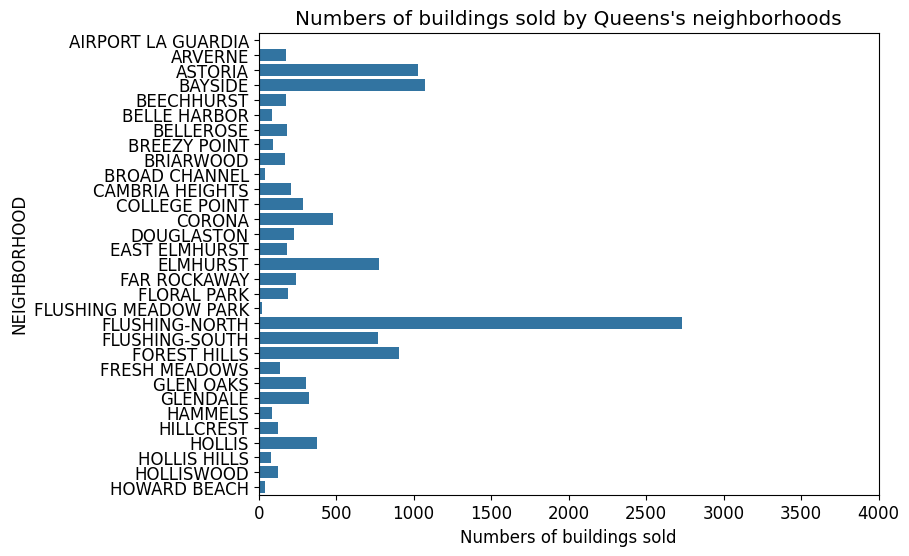

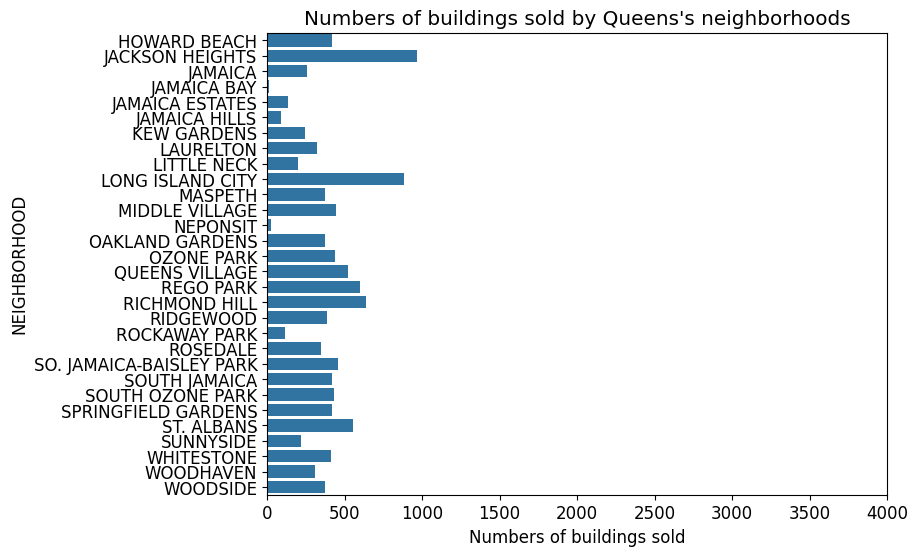

In [7]:
#queens
dfQueens = df.loc[df["BOROUGH"]=='Queens']
dfQueensFirstHalf = dfQueens.head(11662)
dfQueensSecondHalf = dfQueens.tail(len(dfQueens) - 11662)
dfQueensNeighborhoodsSize = dfQueensFirstHalf.groupby('NEIGHBORHOOD').size().reset_index(name = 'Numbers of buildings sold')
dfQueensNeighborhoodsSize =  sns.barplot(x='Numbers of buildings sold', y= 'NEIGHBORHOOD', data=dfQueensNeighborhoodsSize)
dfQueensNeighborhoodsSize.set(title = 'Numbers of buildings sold by Queens\'s neighborhoods')
dfQueensNeighborhoodsSize.set_xlim(0, 4000)
plt.show()
dfQueensNeighborhoodsSize = dfQueensSecondHalf.groupby('NEIGHBORHOOD').size().reset_index(name = 'Numbers of buildings sold')
dfQueensNeighborhoodsSize =  sns.barplot(x='Numbers of buildings sold', y= 'NEIGHBORHOOD', data=dfQueensNeighborhoodsSize)
dfQueensNeighborhoodsSize.set(title = 'Numbers of buildings sold by Queens\'s neighborhoods')
dfQueensNeighborhoodsSize.set_xlim(0, 4000)
plt.show()

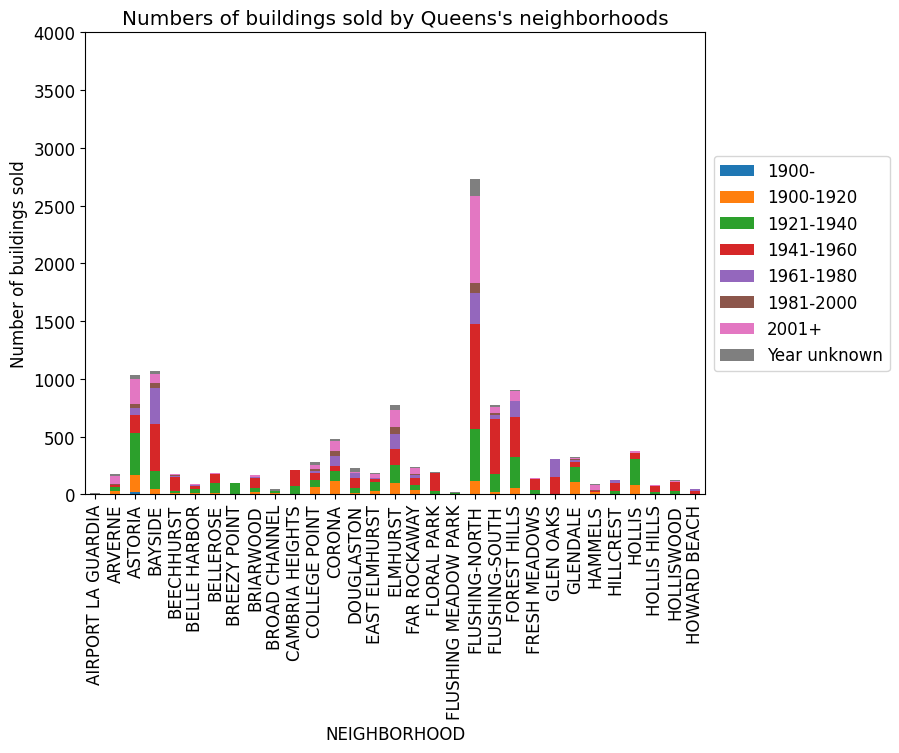

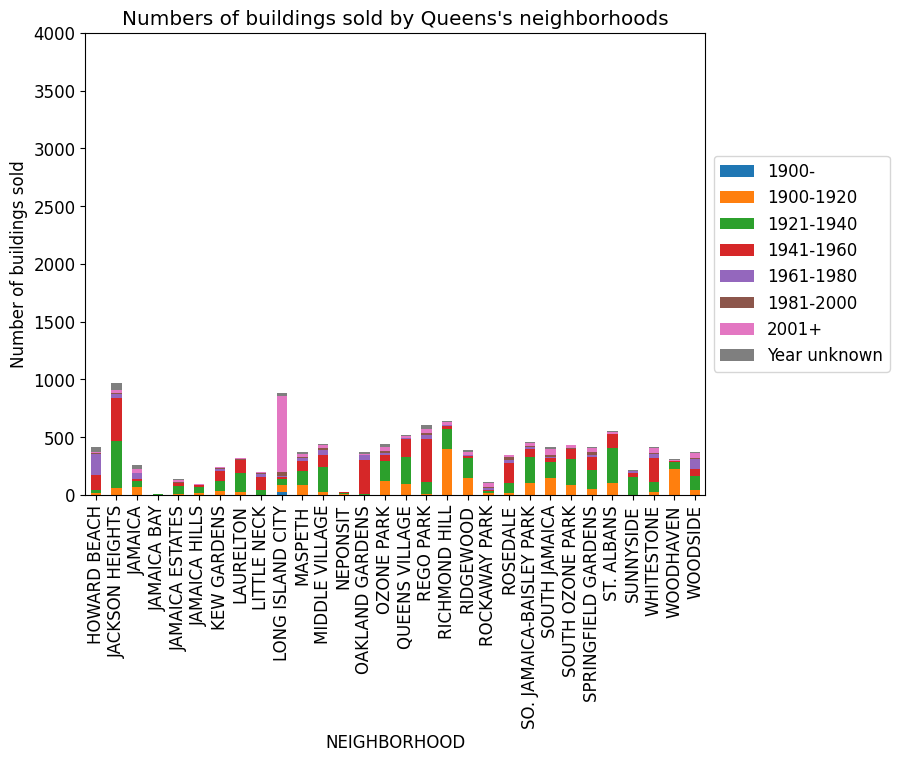

In [8]:
dfQueensNeighborhoodsSizeByTimePeriod = dfQueensFirstHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfQueensNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Queens\'s neighborhoods')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfQueensNeighborhoodsSizeByTimePeriod.set_ylim(0, 4000)
plt.show()
dfQueensNeighborhoodsSizeByTimePeriod = dfQueensSecondHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfQueensNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Queens\'s neighborhoods')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfQueensNeighborhoodsSizeByTimePeriod.set_ylim(0, 4000)
plt.show()

З аналізу графіків видно, що найбільший обсяг продажів нерухомості зафіксовано в районі Флашінґ-Норз, і значна кількість об'єктів була побудована у період після 2000 року. Крім того, виділяються комплекси Лонґ Айленд Сіті, Асторіа та Ельмурст як привабливі області для інвестицій у нерухомість.

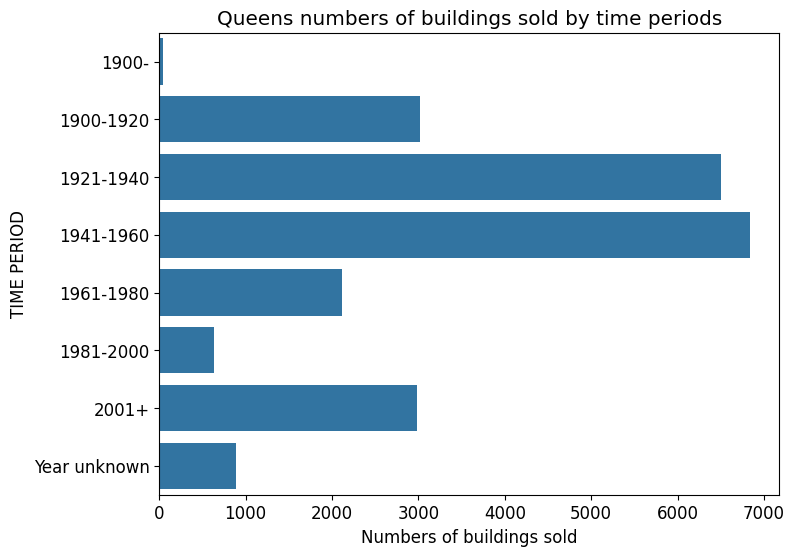

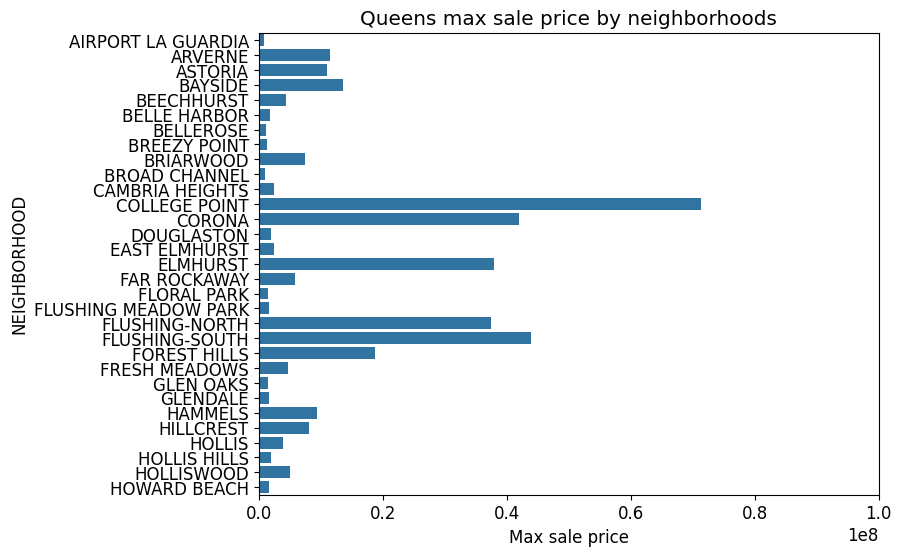

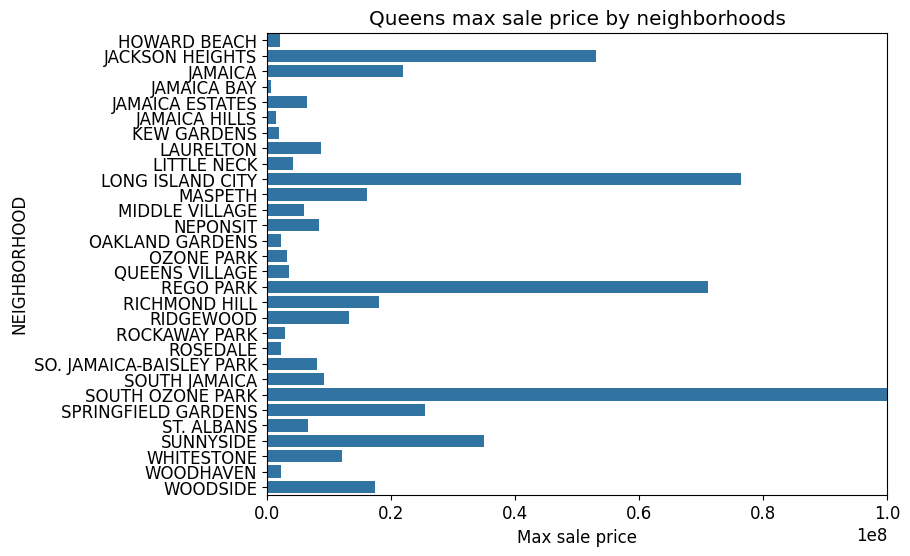

In [9]:
dfQueensNeighborhoodsTimePeriod = dfQueens.groupby('TIME PERIOD')['NEIGHBORHOOD'].size().reset_index(name = 'Numbers of buildings sold')
dfQueensNeighborhoodsTimePeriod =  sns.barplot(x='Numbers of buildings sold', y= 'TIME PERIOD', data=dfQueensNeighborhoodsTimePeriod)
dfQueensNeighborhoodsTimePeriod.set(title = 'Queens numbers of buildings sold by time periods')
plt.show()

dfQueensNeighborhoodsMaxSalePrice = dfQueensFirstHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].max().reset_index(name = 'Max sale price')
dfQueensNeighborhoodsMaxSalePrice =  sns.barplot(x='Max sale price', y= 'NEIGHBORHOOD', data=dfQueensNeighborhoodsMaxSalePrice)
dfQueensNeighborhoodsMaxSalePrice.set(title = 'Queens max sale price by neighborhoods')
dfQueensNeighborhoodsMaxSalePrice.set_xlim(0, 100000000)
plt.show()
dfQueensNeighborhoodsMaxSalePrice = dfQueensSecondHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].max().reset_index(name = 'Max sale price')
dfQueensNeighborhoodsMaxSalePrice =  sns.barplot(x='Max sale price', y= 'NEIGHBORHOOD', data=dfQueensNeighborhoodsMaxSalePrice)
dfQueensNeighborhoodsMaxSalePrice.set(title = 'Queens max sale price by neighborhoods')
dfQueensNeighborhoodsMaxSalePrice.set_xlim(0, 100000000)
plt.show()


Відзначається, що починаючи з 1961 року кількість продажів нерухомості у Квінс відзначилася суттєвим зниженням, проте вона відновилася до рівня близько 3000 продажів починаючи з 2001 року.
З першого графіка видно, що найвища ціна продажу зафіксована в Cоуз Озон Парк (приблизно 125 мільйонів доларів). Однак, згідно з другим графіком, середнє значення цін в Cоуз Озон Парк близьке до середнього значення інших районів (приблизно 0,65 мільйона доларів). Важливо відзначити, що середні ціни в Ямайці, Хілкресті та Лонґ Айленд Сіті значуще вищі (відповідно близько 3.4, 2.7 та 1.75 мільйонів доларів). Це дозволяє зробити висновок, що ці райони є привабливими для будівництва, оскільки нерухомість там має стабільно високі ціни.

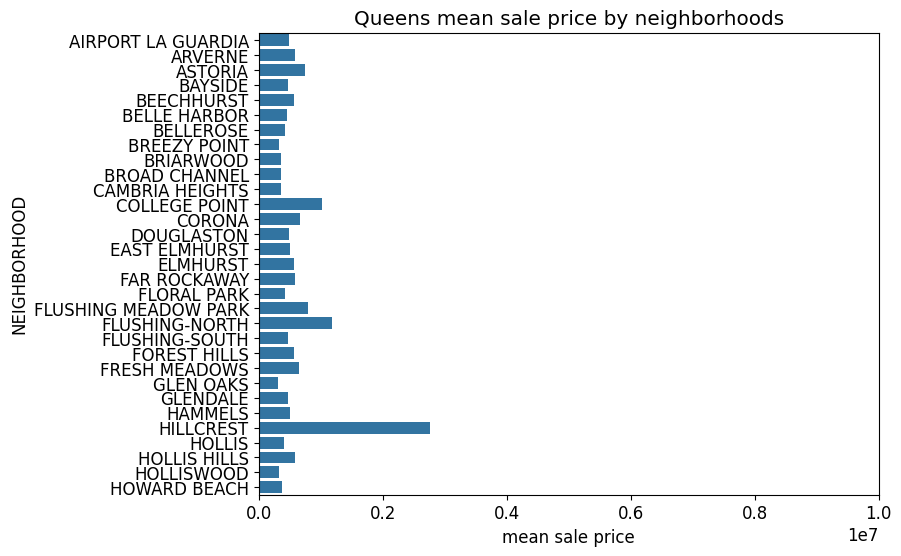

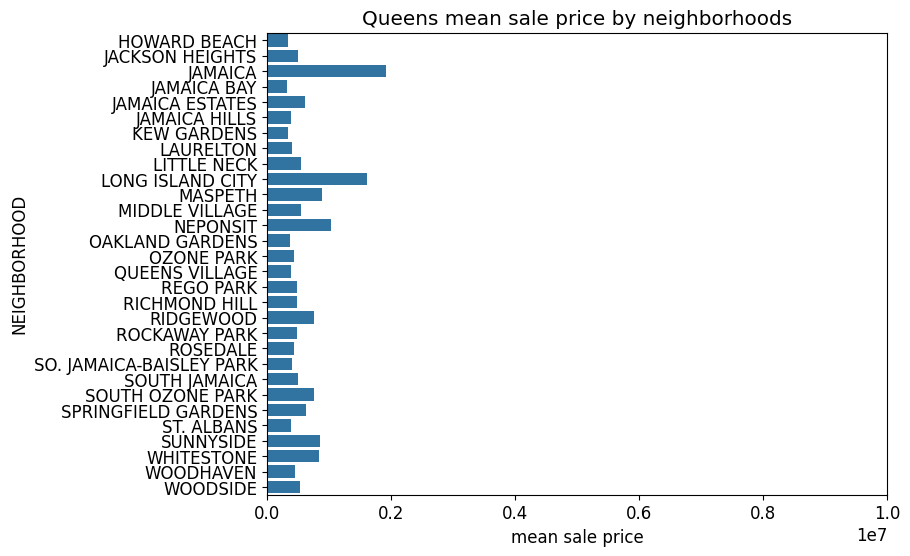

In [10]:
dfQueensNeighborhoodsMeanSalePrice = dfQueensFirstHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index(name = 'mean sale price')
dfQueensNeighborhoodsMeanSalePrice =  sns.barplot(x='mean sale price', y= 'NEIGHBORHOOD', data=dfQueensNeighborhoodsMeanSalePrice)
dfQueensNeighborhoodsMeanSalePrice.set(title = 'Queens mean sale price by neighborhoods')
dfQueensNeighborhoodsMeanSalePrice.set_xlim(0, 10000000)
plt.show()
dfQueensNeighborhoodsMeanSalePrice = dfQueensSecondHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index(name = 'mean sale price')
dfQueensNeighborhoodsMeanSalePrice =  sns.barplot(x='mean sale price', y= 'NEIGHBORHOOD', data=dfQueensNeighborhoodsMeanSalePrice)
dfQueensNeighborhoodsMeanSalePrice.set(title = 'Queens mean sale price by neighborhoods')
dfQueensNeighborhoodsMeanSalePrice.set_xlim(0, 10000000)
plt.show()

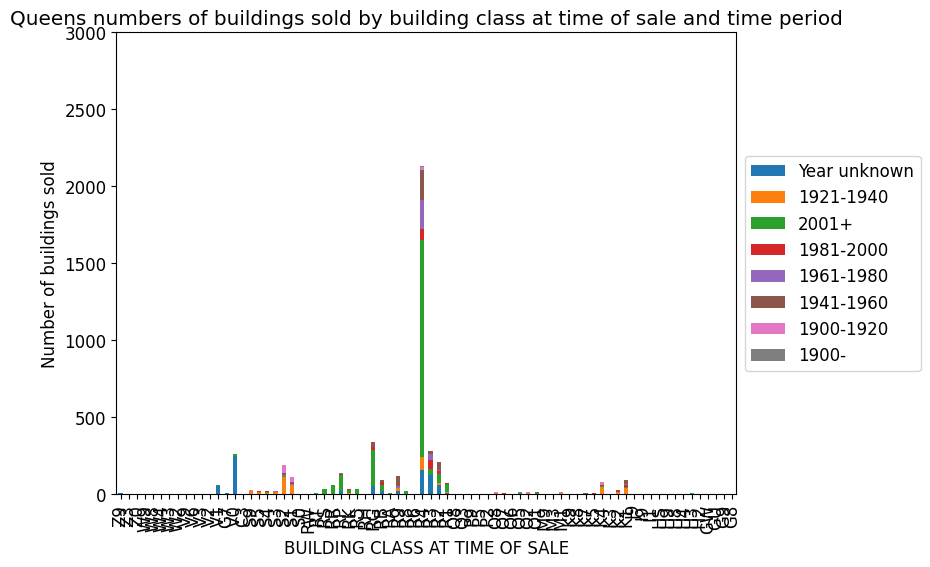

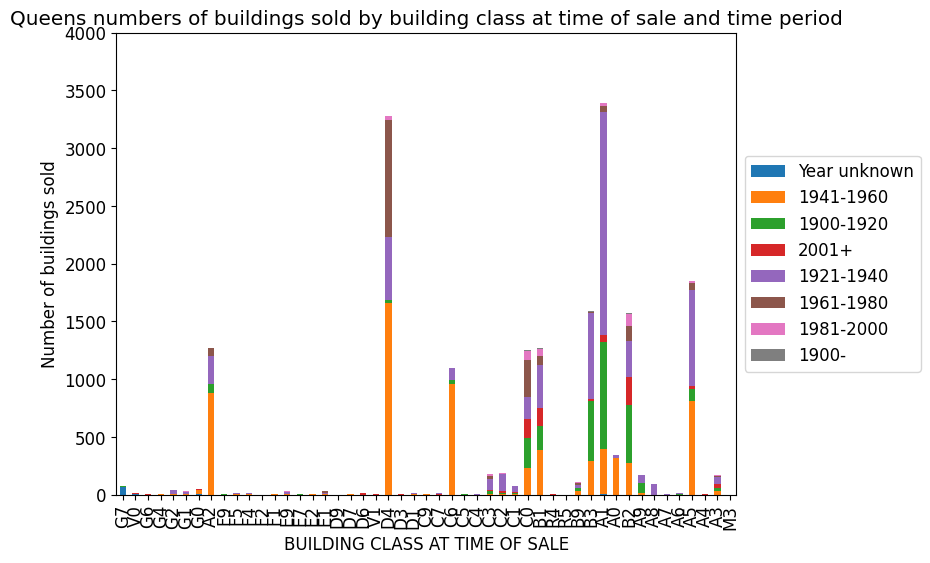

In [11]:
dfQueensSorted = dfQueens.sort_values(by = ['BUILDING CLASS AT PRESENT'], ascending=False)
dfQueensSortedFirstHalf = dfQueensSorted.head(4690).reset_index()
dfQueensSortedSecondHalf = dfQueensSorted.tail(len(dfQueensSorted.index) - 4690).reset_index()
dfQueensNeighborhoodsSizeByTimePeriod = dfQueensSortedFirstHalf.groupby(['BUILDING CLASS AT TIME OF SALE', 'TIME PERIOD'], sort = False).size().unstack().plot(kind='bar', stacked=True)
dfQueensNeighborhoodsSizeByTimePeriod.set(title = 'Queens numbers of buildings sold by building class at time of sale and time period')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfQueensNeighborhoodsSizeByTimePeriod.set_ylim(0, 3000)
plt.show()
dfQueensNeighborhoodsSizeByTimePeriod = dfQueensSortedSecondHalf.groupby(['BUILDING CLASS AT TIME OF SALE', 'TIME PERIOD'], sort = False).size().unstack().plot(kind='bar', stacked=True)
dfQueensNeighborhoodsSizeByTimePeriod.set(title = 'Queens numbers of buildings sold by building class at time of sale and time period')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfQueensNeighborhoodsSizeByTimePeriod.set_ylim(0, 4000)
plt.show()

З графіка можна зробити висновок, що на сьогодні найбільший попит спостерігається на класи будівель R4, B1, B2 та C0. Раніше D4 був надзвичайно популярним, але в даний момент його майже не продають. Особливим попитом користується клас R4.

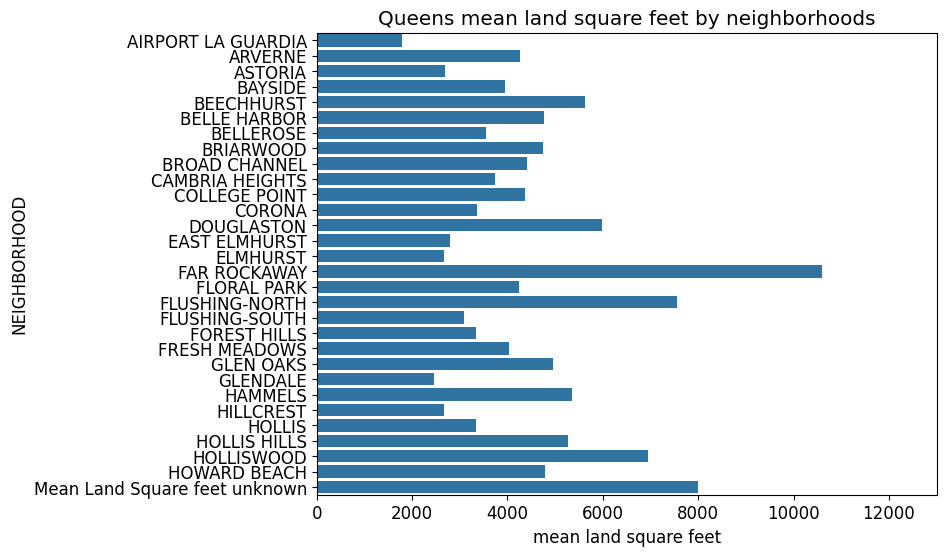

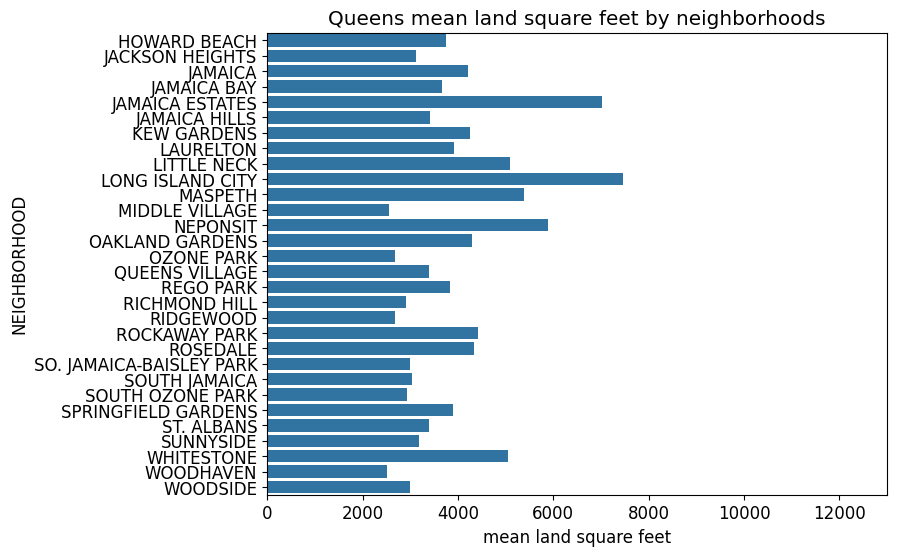

In [12]:
indexLandSquareFeetWholeArray = dfQueens[ (dfQueens['LAND SQUARE FEET']=='Land square feet is unknown')].index
indexLandSquareFeet = dfQueensFirstHalf[ (dfQueensFirstHalf['LAND SQUARE FEET']=='Land square feet is unknown')].index
dfQueensFirstHalf.drop(indexLandSquareFeet , inplace=True)
dfQueensNeighborhoodsMeanSalePrice = dfQueensFirstHalf.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].mean().reset_index(name = 'mean land square feet')
new_row = pd.DataFrame({'NEIGHBORHOOD': ['Mean Land Square feet unknown'], 'mean land square feet': [len(indexLandSquareFeetWholeArray)]})
dfQueensNeighborhoodsMeanSalePrice = pd.concat([dfQueensNeighborhoodsMeanSalePrice, new_row], ignore_index=True)
dfQueensNeighborhoodsMeanSalePrice =  sns.barplot(x='mean land square feet', y= 'NEIGHBORHOOD', data=dfQueensNeighborhoodsMeanSalePrice)
dfQueensNeighborhoodsMeanSalePrice.set(title = 'Queens mean land square feet by neighborhoods')
dfQueensNeighborhoodsMeanSalePrice.set_xlim(0, 13000)
plt.show()
indexLandSquareFeet = dfQueensSecondHalf[ (dfQueensSecondHalf['LAND SQUARE FEET']=='Land square feet is unknown')].index
dfQueensDropped = dfQueensSecondHalf.drop(indexLandSquareFeet , inplace=True)
dfQueensNeighborhoodsMeanSalePrice = dfQueensSecondHalf.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].mean().reset_index(name = 'mean land square feet')
dfQueensNeighborhoodsMeanSalePrice =  sns.barplot(x='mean land square feet', y= 'NEIGHBORHOOD', data=dfQueensNeighborhoodsMeanSalePrice)
dfQueensNeighborhoodsMeanSalePrice.set(title = 'Queens mean land square feet by neighborhoods')
dfQueensNeighborhoodsMeanSalePrice.set_xlim(0, 13000)
plt.show()


Для більшості районів характерним є попит на житлові площі від 2000 до 6000 м^2, однак у Лонґ Айленд Сіті, Холлісвуді, Флашінґ-Норз та Фар Рокевей вони перевищують 7000 м^2.

В загальному про Квінкс

Нерухомість характеризується низькими середніми цінами та середніми обсягами продажів у всіх районах, що робить його менш привабливим для потенційних нових інвестицій у нерухомість. У випадку прийняття рішення про інвестування, найбільш вигідними класами будівель для цього будуть C0, B1 та B2.

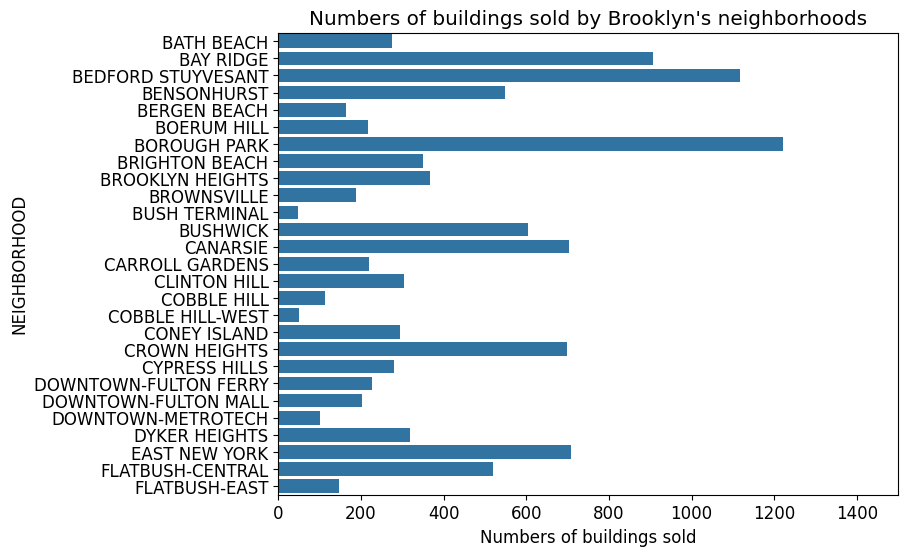

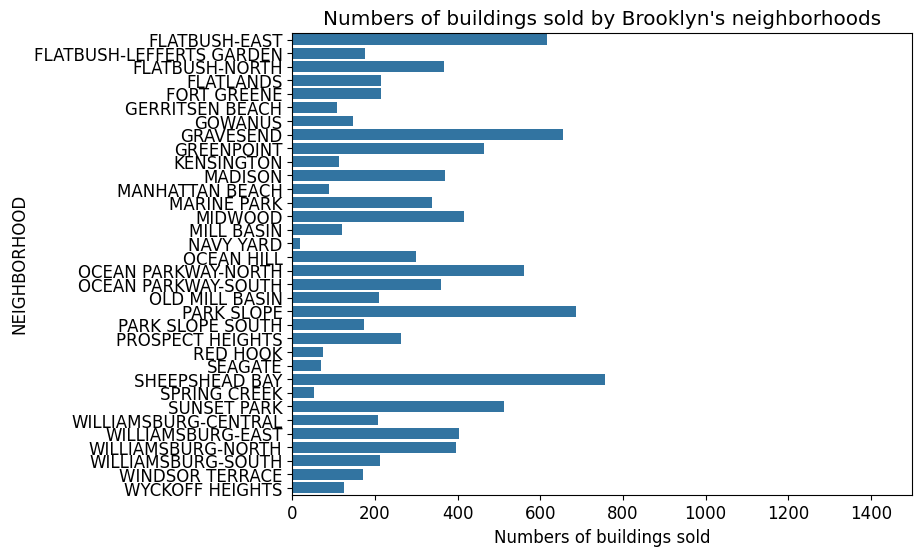

In [13]:
#brooklyn
dfBrooklyn = df.loc[df["BOROUGH"]=='Brooklyn']
dfBrooklynFirstHalf = dfBrooklyn.head(10899)
dfBrooklynSecondHalf = dfBrooklyn.tail(len(dfBrooklyn) - 10899)
dfBrooklynNeighborhoodsSize = dfBrooklynFirstHalf.groupby('NEIGHBORHOOD').size().reset_index(name = 'Numbers of buildings sold')
dfBrooklynNeighborhoodsSize =  sns.barplot(x='Numbers of buildings sold', y= 'NEIGHBORHOOD', data=dfBrooklynNeighborhoodsSize)
dfBrooklynNeighborhoodsSize.set(title = 'Numbers of buildings sold by Brooklyn\'s neighborhoods')
dfBrooklynNeighborhoodsSize.set_xlim(0, 1500)
plt.show()
dfBrooklynNeighborhoodsSize = dfBrooklynSecondHalf.groupby('NEIGHBORHOOD').size().reset_index(name = 'Numbers of buildings sold')
dfBrooklynNeighborhoodsSize =  sns.barplot(x='Numbers of buildings sold', y= 'NEIGHBORHOOD', data=dfBrooklynNeighborhoodsSize)
dfBrooklynNeighborhoodsSize.set(title = 'Numbers of buildings sold by Brooklyn\'s neighborhoods')
dfBrooklynNeighborhoodsSize.set_xlim(0, 1500)
plt.show()


На графіках можна спостерігати, що найвищий обсяг продажів нерухомості зафіксовано в районах Бей Рідж, Бедфорд Стуйвесант та Борум Хіл. З другого графіка можна зробити висновок, що попитом користуються райони Бушвік, Шіпшед Бей, Вільямсбург Соуз та Вільямсбург Норз.

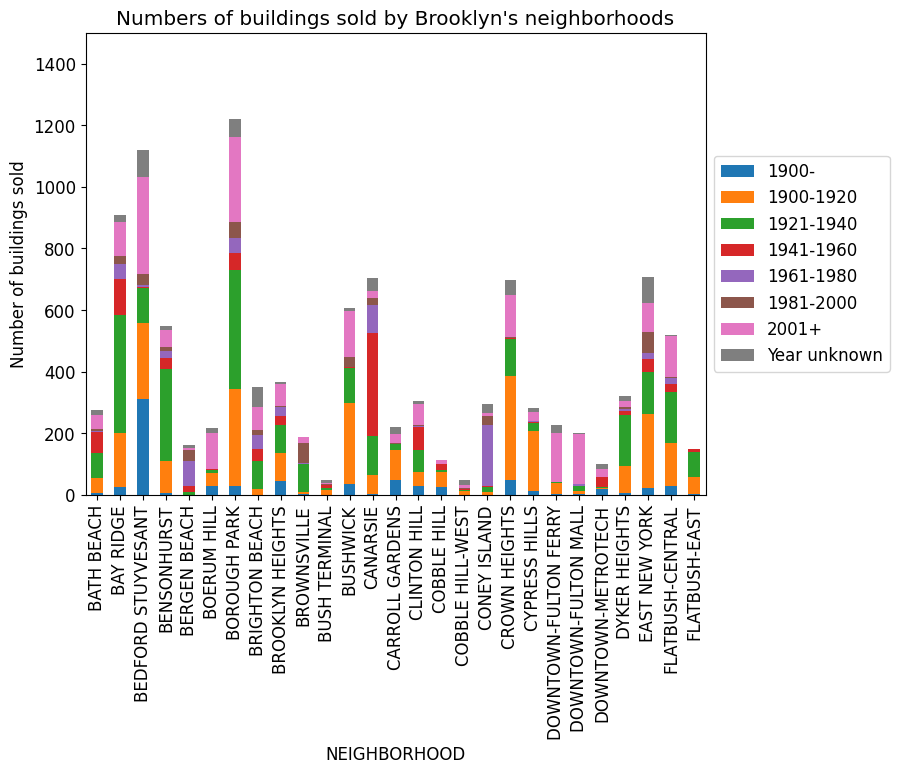

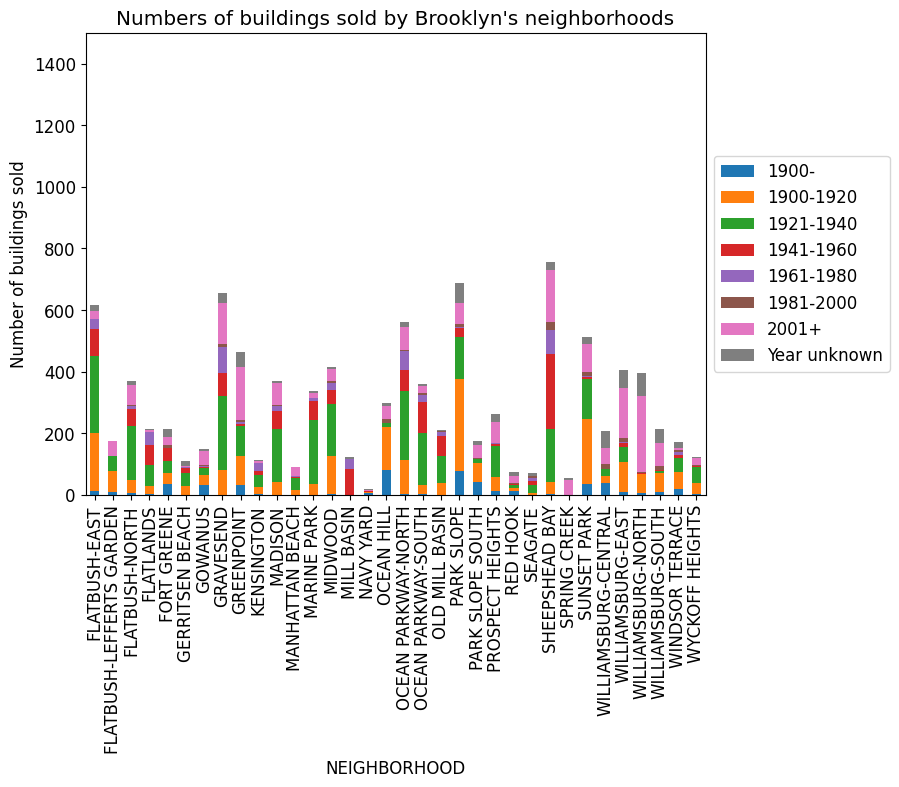

In [14]:
dfBrooklynNeighborhoodsSizeByTimePeriod = dfBrooklynFirstHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfBrooklynNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Brooklyn\'s neighborhoods')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfBrooklynNeighborhoodsSizeByTimePeriod.set_ylim(0, 1500)
plt.show()
dfBrooklynNeighborhoodsSizeByTimePeriod = dfBrooklynSecondHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfBrooklynNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Brooklyn\'s neighborhoods')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfBrooklynNeighborhoodsSizeByTimePeriod.set_ylim(0, 1500)
plt.show()

Варто відзначити, що з 1941 року кількість продажів нерухомості в Брукліні суттєво знизилася, проте вона відновилася до рівня близько 4000 продажів починаючи з 2001 року.

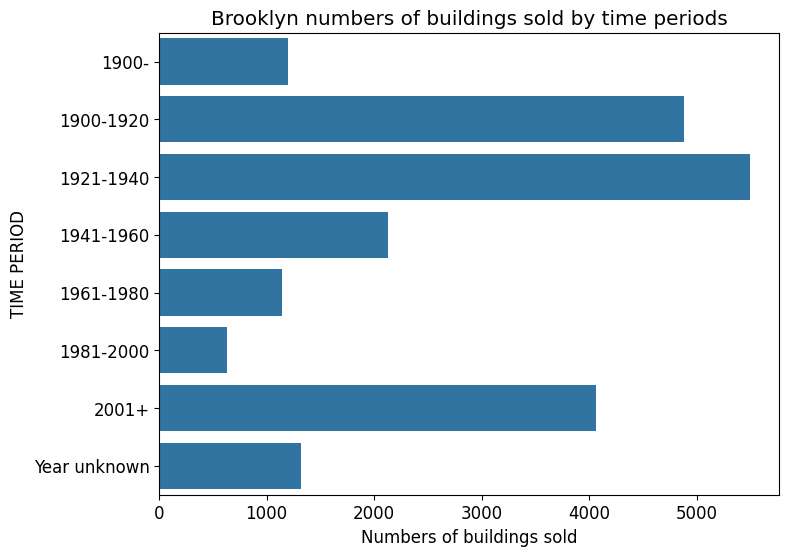

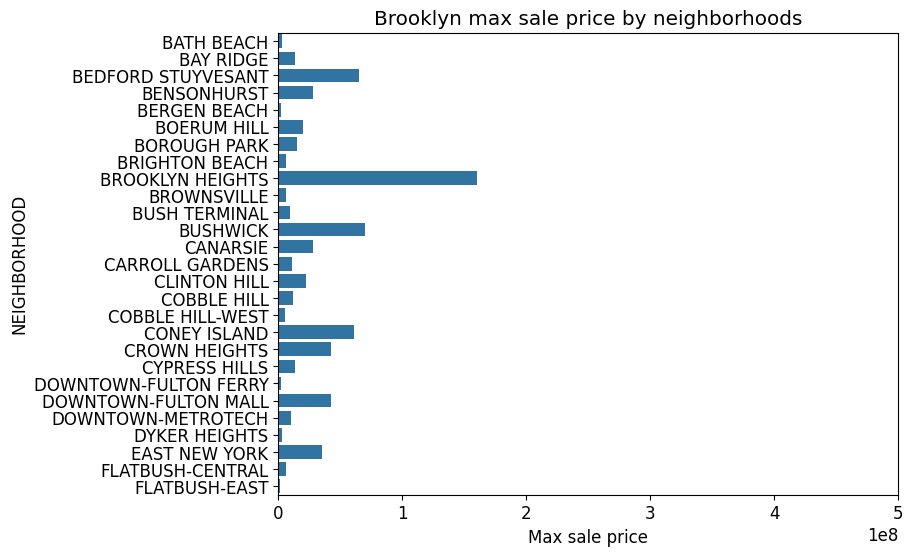

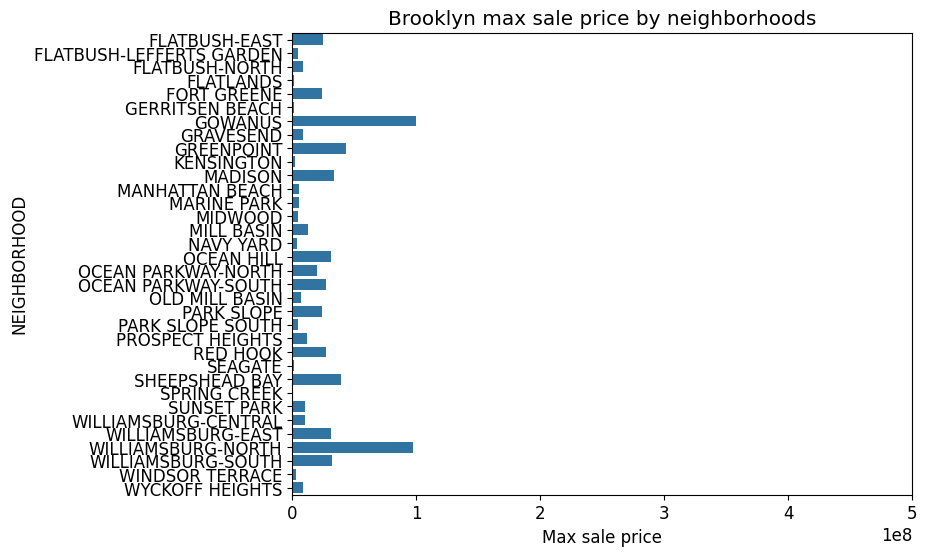

In [31]:
dfBrooklynNeighborhoodsTimePeriod = dfBrooklyn.groupby('TIME PERIOD')['NEIGHBORHOOD'].size().reset_index(name = 'Numbers of buildings sold')
dfBrooklynNeighborhoodsTimePeriod =  sns.barplot(x='Numbers of buildings sold', y= 'TIME PERIOD', data=dfBrooklynNeighborhoodsTimePeriod)
dfBrooklynNeighborhoodsTimePeriod.set(title = 'Brooklyn numbers of buildings sold by time periods')
plt.show()
dfBrooklynNeighborhoodsMaxSalePrice = dfBrooklynFirstHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].max().reset_index(name = 'Max sale price')
dfBrooklynNeighborhoodsMaxSalePrice =  sns.barplot(x='Max sale price', y= 'NEIGHBORHOOD', data=dfBrooklynNeighborhoodsMaxSalePrice)
dfBrooklynNeighborhoodsMaxSalePrice.set(title = 'Brooklyn max sale price by neighborhoods')
dfBrooklynNeighborhoodsMaxSalePrice.set_xlim(0, 500000000)
plt.show()
dfBrooklynNeighborhoodsMaxSalePrice = dfBrooklynSecondHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].max().reset_index(name = 'Max sale price')
dfBrooklynNeighborhoodsMaxSalePrice =  sns.barplot(x='Max sale price', y= 'NEIGHBORHOOD', data=dfBrooklynNeighborhoodsMaxSalePrice)
dfBrooklynNeighborhoodsMaxSalePrice.set(title = 'Brooklyn max sale price by neighborhoods')
dfBrooklynNeighborhoodsMaxSalePrice.set_xlim(0, 500000000)
plt.show()

Перший графік демонструє, що найвища ціна продажу зафіксована в Бруклін Хайтс (близько 160 мільйонів доларів). Однак другий графік вказує, що хоча середнє значення цін в Бруклін Хайтс є одним з найвищих, середнє значення району Ґованус є найбільшим (близько 4,7 мільйонів доларів). Також райони Вільямсбург Норз та Даунтаун Метротех відзначаються досить високими цінами. Ці райони можуть бути розглянуті як потенційні місця для будівництва нерухомості через стабільно високі ціни.

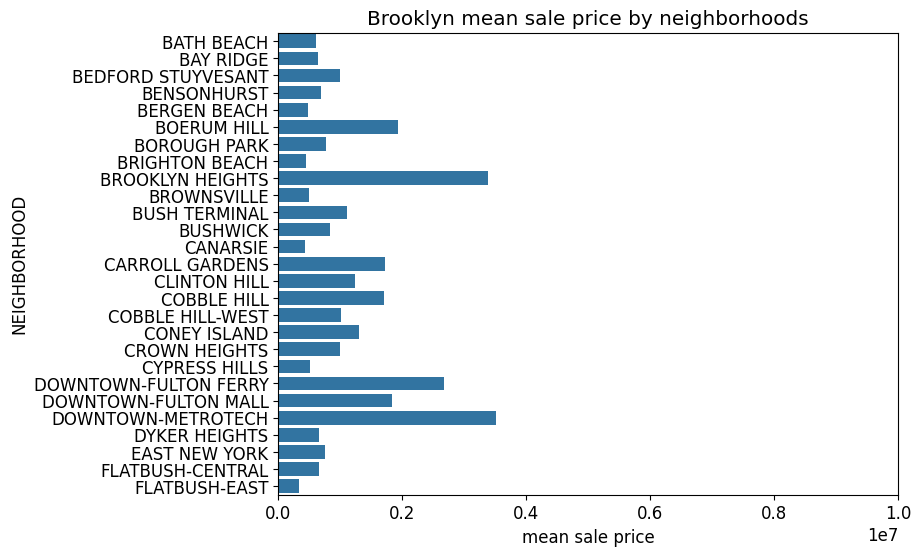

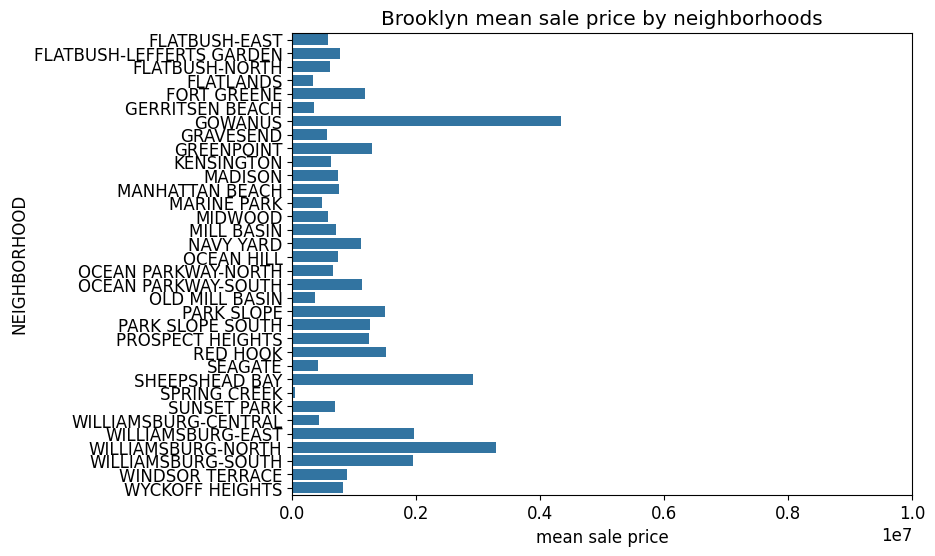

In [16]:
dfBrooklynNeighborhoodsMeanSalePrice = dfBrooklynFirstHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index(name = 'mean sale price')
dfBrooklynNeighborhoodsMeanSalePrice =  sns.barplot(x='mean sale price', y= 'NEIGHBORHOOD', data=dfBrooklynNeighborhoodsMeanSalePrice)
dfBrooklynNeighborhoodsMeanSalePrice.set(title = 'Brooklyn mean sale price by neighborhoods')
dfBrooklynNeighborhoodsMeanSalePrice.set_xlim(0, 10000000)
plt.show()
dfBrooklynNeighborhoodsMeanSalePrice = dfBrooklynSecondHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index(name = 'mean sale price')
dfBrooklynNeighborhoodsMeanSalePrice =  sns.barplot(x='mean sale price', y= 'NEIGHBORHOOD', data=dfBrooklynNeighborhoodsMeanSalePrice)
dfBrooklynNeighborhoodsMeanSalePrice.set(title = 'Brooklyn mean sale price by neighborhoods')
dfBrooklynNeighborhoodsMeanSalePrice.set_xlim(0, 10000000)
plt.show()

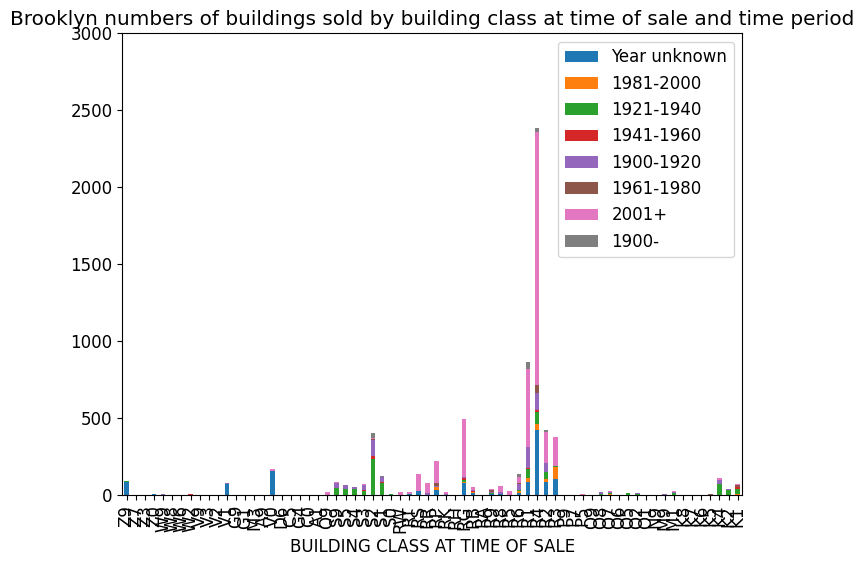

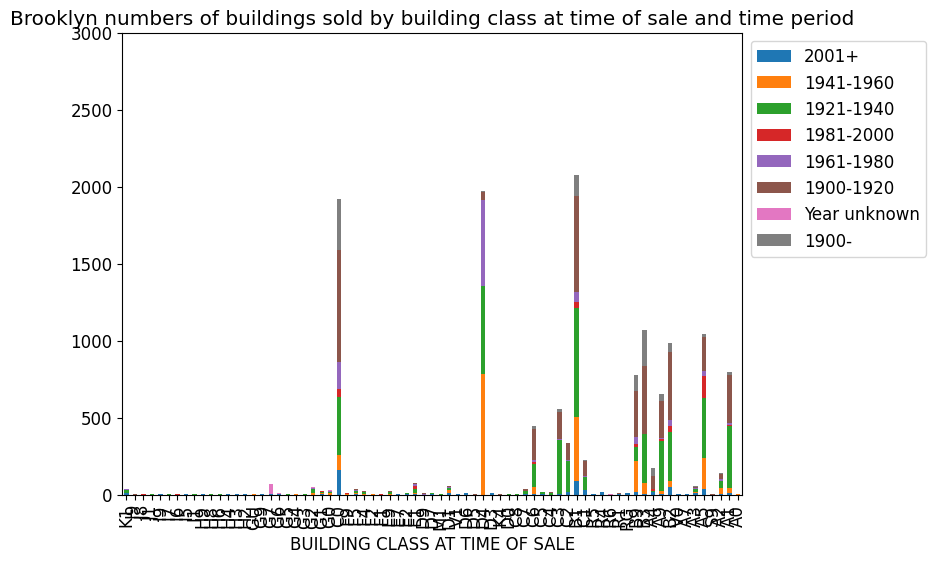

In [17]:
dfBrooklynSorted = dfBrooklyn.sort_values(by = ['BUILDING CLASS AT PRESENT'], ascending=False)
dfBrooklynSortedFirstHalf = dfBrooklynSorted.head(6972).reset_index()
dfBrooklynSortedSecondHalf = dfBrooklynSorted.tail(len(dfBrooklynSorted.index) - 6972).reset_index()
dfBrooklynNeighborhoodsSizeByTimePeriod = dfBrooklynSortedFirstHalf.groupby(['BUILDING CLASS AT TIME OF SALE', 'TIME PERIOD'], sort = False).size().unstack().plot(kind='bar', stacked=True)
dfBrooklynNeighborhoodsSizeByTimePeriod.set(title = 'Brooklyn numbers of buildings sold by building class at time of sale and time period')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.legend(bbox_to_anchor=(1.0, 1.0))
dfBrooklynNeighborhoodsSizeByTimePeriod.set_ylim(0, 3000)
plt.show()
dfBrooklynNeighborhoodsSizeByTimePeriod = dfBrooklynSortedSecondHalf.groupby(['BUILDING CLASS AT TIME OF SALE', 'TIME PERIOD'], sort = False).size().unstack().plot(kind='bar', stacked=True)
dfBrooklynNeighborhoodsSizeByTimePeriod.set(title = 'Brooklyn numbers of buildings sold by building class at time of sale and time period')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.legend(bbox_to_anchor=(1.0, 1.0))
dfBrooklynNeighborhoodsSizeByTimePeriod.set_ylim(0, 3000)
plt.show()

На графіку можна визначити, що на сьогоднішній день найбільший попит спостерігається на класи будівель R4, R1, RG та RP, RR, RS та C0. D4 був дуже популярним раніше, але наразі його майже не продають. Зокрема, класи R4 та R1 користуються особливим попитом.

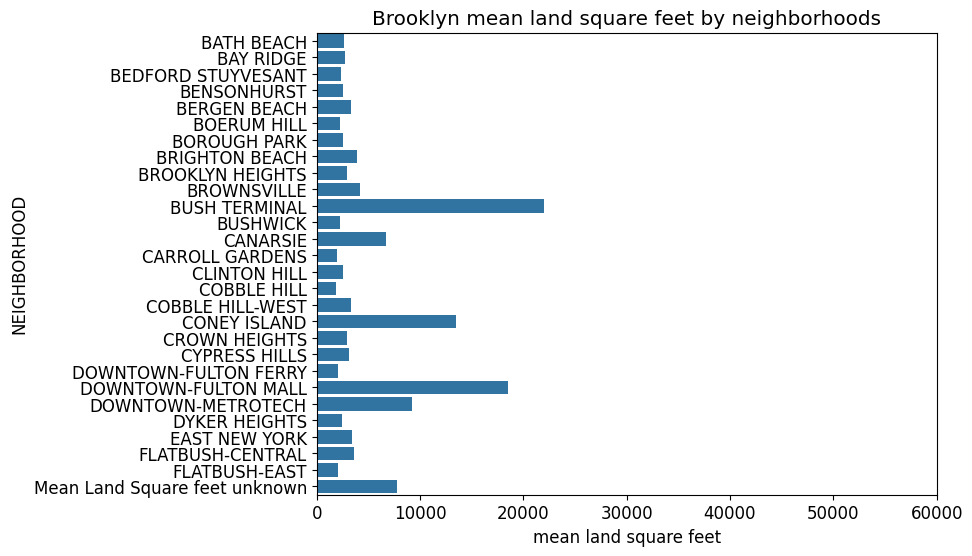

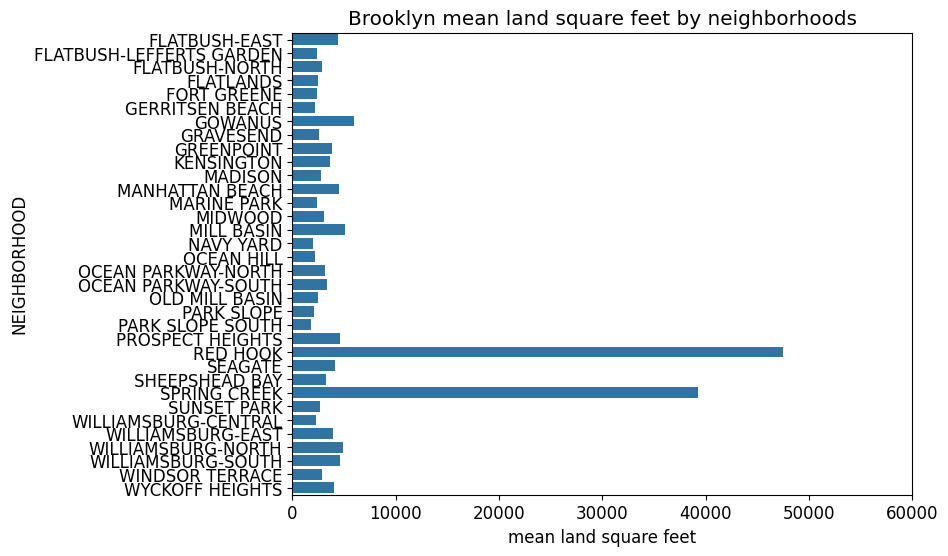

In [18]:
indexLandSquareFeetWholeArray = dfBrooklyn[ (dfBrooklyn['LAND SQUARE FEET']=='Land square feet is unknown')].index
indexLandSquareFeet = dfBrooklynFirstHalf[ (dfBrooklynFirstHalf['LAND SQUARE FEET']=='Land square feet is unknown')].index
dfBrooklynFirstHalf.drop(indexLandSquareFeet , inplace=True)
dfBrooklynNeighborhoodsMeanSalePrice = dfBrooklynFirstHalf.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].mean().reset_index(name = 'mean land square feet')
new_row = pd.DataFrame({'NEIGHBORHOOD': ['Mean Land Square feet unknown'], 'mean land square feet': [len(indexLandSquareFeetWholeArray)]})
dfBrooklynNeighborhoodsMeanSalePrice = pd.concat([dfBrooklynNeighborhoodsMeanSalePrice, new_row], ignore_index=True)
dfBrooklynNeighborhoodsMeanSalePrice =  sns.barplot(x='mean land square feet', y= 'NEIGHBORHOOD', data=dfBrooklynNeighborhoodsMeanSalePrice)
dfBrooklynNeighborhoodsMeanSalePrice.set(title = 'Brooklyn mean land square feet by neighborhoods')
dfBrooklynNeighborhoodsMeanSalePrice.set_xlim(0, 60000)
plt.show()
indexLandSquareFeet = dfBrooklynSecondHalf[ (dfBrooklynSecondHalf['LAND SQUARE FEET']=='Land square feet is unknown')].index
dfBrooklynDropped = dfBrooklynSecondHalf.drop(indexLandSquareFeet , inplace=True)
dfBrooklynNeighborhoodsMeanSalePrice = dfBrooklynSecondHalf.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].mean().reset_index(name = 'mean land square feet')
dfBrooklynNeighborhoodsMeanSalePrice =  sns.barplot(x='mean land square feet', y= 'NEIGHBORHOOD', data=dfBrooklynNeighborhoodsMeanSalePrice)
dfBrooklynNeighborhoodsMeanSalePrice.set(title = 'Brooklyn mean land square feet by neighborhoods')
dfBrooklynNeighborhoodsMeanSalePrice.set_xlim(0, 60000)
plt.show()

Для більшості районів характерний попит на житлові площі від 0 до 20 000 м^2, але у Ред Хук, Спрінґ Крік та Буш Термінал площі перевищують 20 000 м^2.

В загальному про Бруклін

Бруклін відзначається високою середньою ціною нерухомості в районах Ґованус та Бруклін Хайтс, а також великим обсягом продажів на сьогоднішній день, роблячи його досить привабливим для нових інвестицій у нерухомість. При прийнятті рішення про інвестиції, найбільш вигідними класами будівель для цього можуть бути R1, R2, R3, R4, RG, RP, RS та G7.

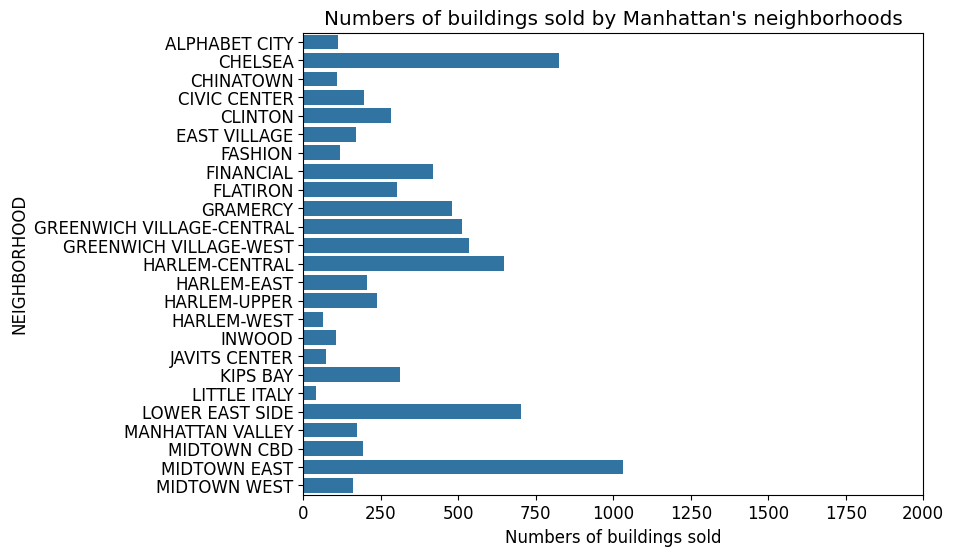

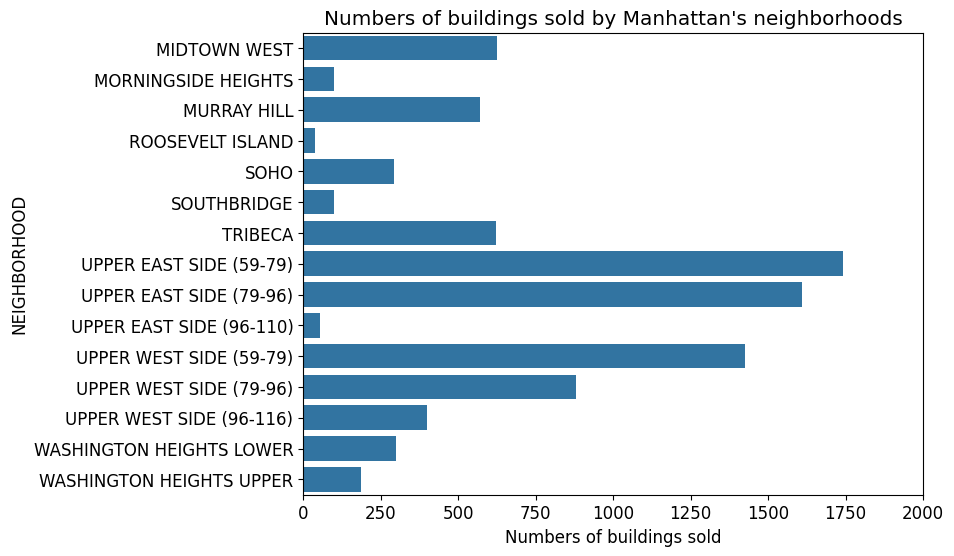

In [19]:
#Manhattan
dfManhattan = df.loc[df["BOROUGH"]=='Manhattan']
dfManhattanFirstHalf = dfManhattan.head(8001)
dfManhattanSecondHalf = dfManhattan.tail(len(dfManhattan) - 8001)
dfManhattanNeighborhoodsSize = dfManhattanFirstHalf.groupby('NEIGHBORHOOD').size().reset_index(name = 'Numbers of buildings sold')
dfManhattanNeighborhoodsSize =  sns.barplot(x='Numbers of buildings sold', y= 'NEIGHBORHOOD', data=dfManhattanNeighborhoodsSize)
dfManhattanNeighborhoodsSize.set(title = 'Numbers of buildings sold by Manhattan\'s neighborhoods')
dfManhattanNeighborhoodsSize.set_xlim(0, 2000)
plt.show()
dfManhattanNeighborhoodsSize = dfManhattanSecondHalf.groupby('NEIGHBORHOOD').size().reset_index(name = 'Numbers of buildings sold')
dfManhattanNeighborhoodsSize =  sns.barplot(x='Numbers of buildings sold', y= 'NEIGHBORHOOD', data=dfManhattanNeighborhoodsSize)
dfManhattanNeighborhoodsSize.set(title = 'Numbers of buildings sold by Manhattan\'s neighborhoods')
dfManhattanNeighborhoodsSize.set_xlim(0, 2000)
plt.show()

На графіках видно, що найбільший обсяг продажів нерухомості зафіксовано у районах Апер Іст Сайд(59-79), Апер Іст Сайд(79-96) та Апер Вест Сайд(59-79). Проте, з другого графіка можна зробити висновок, що Апер Іст Сайд(59-79) не користується сильним попитом починаючи з 2001 року. Також зауважується попит на будівлі, побудовані після 2001 року.

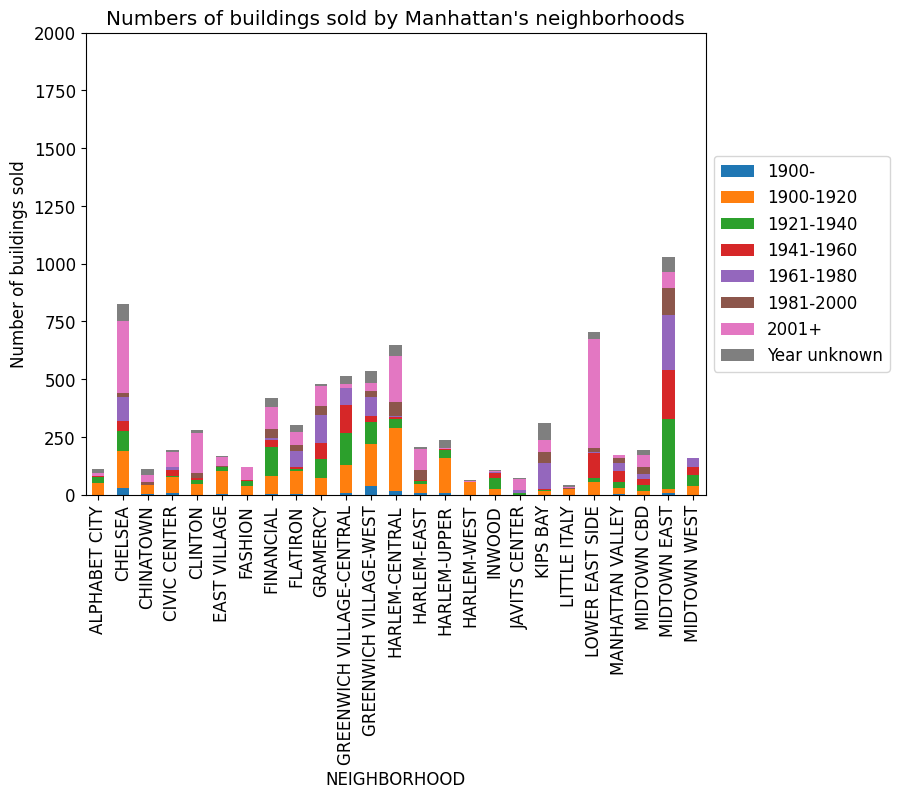

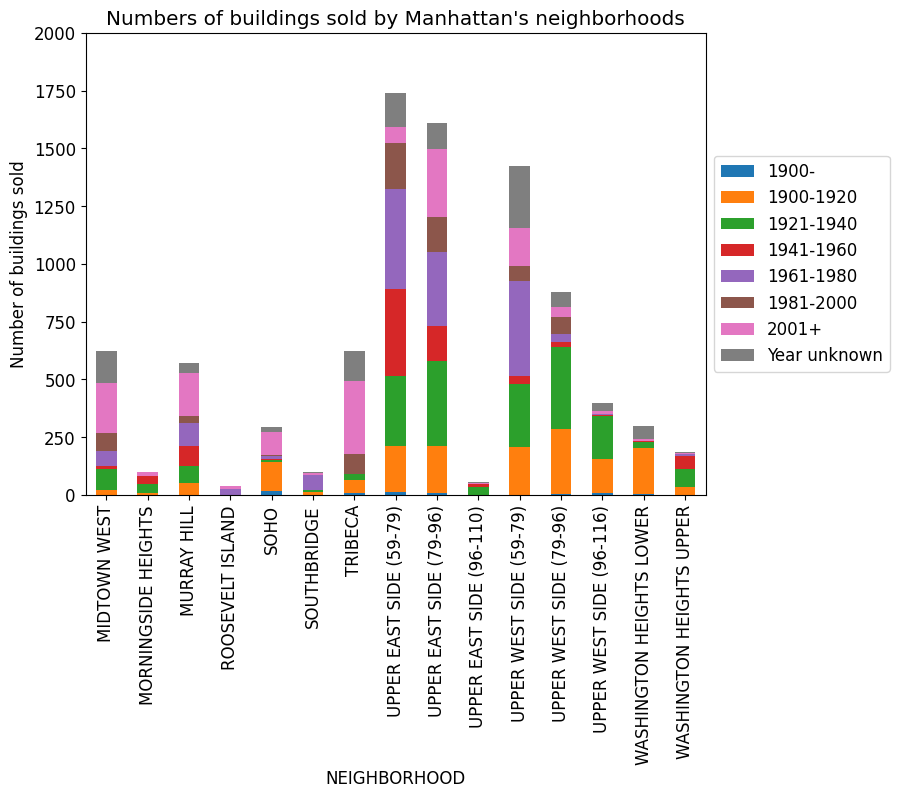

In [20]:
dfManhattanNeighborhoodsSizeByTimePeriod = dfManhattanFirstHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfManhattanNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Manhattan\'s neighborhoods')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Number of buildings sold')
dfManhattanNeighborhoodsSizeByTimePeriod.set_ylim(0, 2000)
plt.show()
dfManhattanNeighborhoodsSizeByTimePeriod = dfManhattanSecondHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfManhattanNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Manhattan\'s neighborhoods')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Number of buildings sold')
dfManhattanNeighborhoodsSizeByTimePeriod.set_ylim(0, 2000)
plt.show()

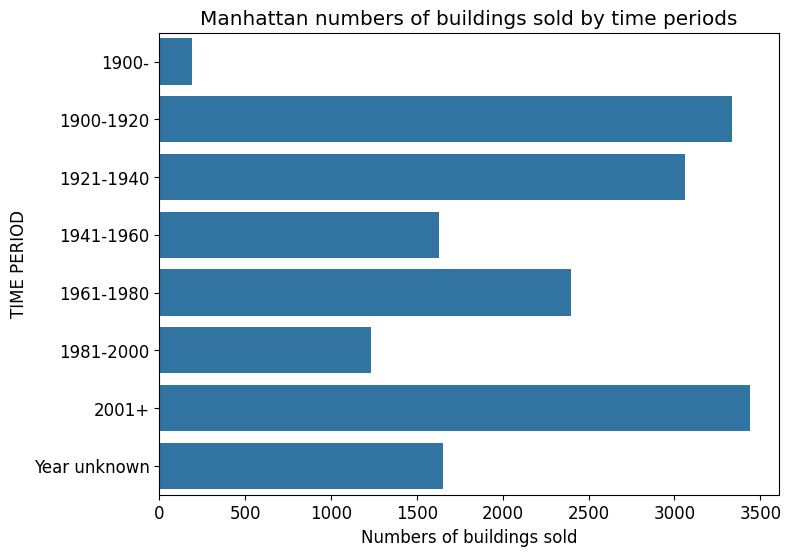

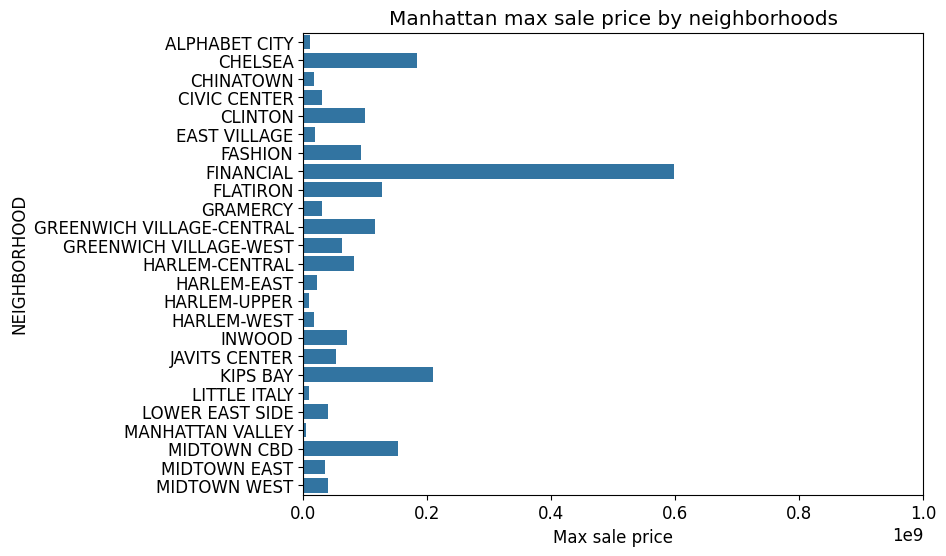

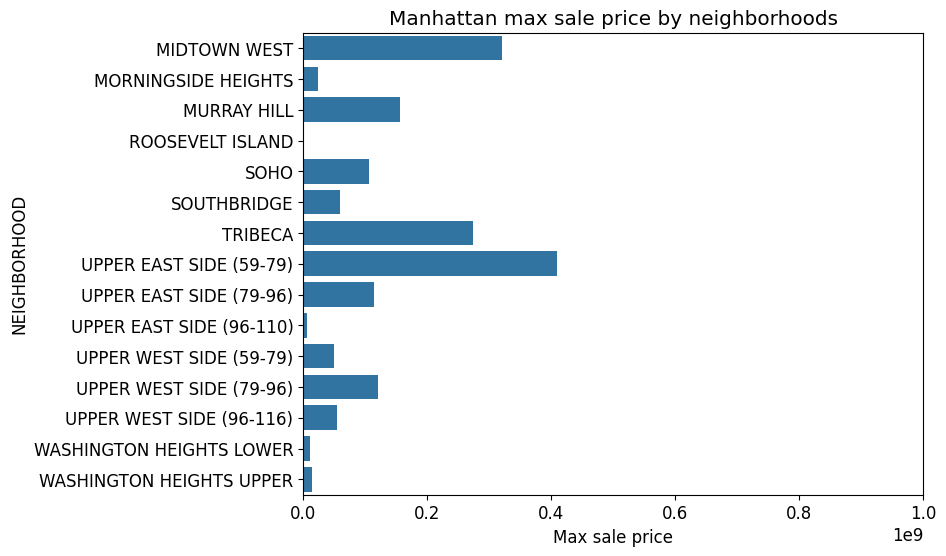

In [21]:
dfManhattanNeighborhoodsTimePeriod = dfManhattan.groupby('TIME PERIOD')['NEIGHBORHOOD'].size().reset_index(name = 'Numbers of buildings sold')
dfManhattanNeighborhoodsTimePeriod =  sns.barplot(x='Numbers of buildings sold', y= 'TIME PERIOD', data=dfManhattanNeighborhoodsTimePeriod)
dfManhattanNeighborhoodsTimePeriod.set(title = 'Manhattan numbers of buildings sold by time periods')
plt.show()
dfManhattanNeighborhoodsMaxSalePrice = dfManhattanFirstHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].max().reset_index(name = 'Max sale price')
dfManhattanNeighborhoodsMaxSalePrice =  sns.barplot(x='Max sale price', y= 'NEIGHBORHOOD', data=dfManhattanNeighborhoodsMaxSalePrice)
dfManhattanNeighborhoodsMaxSalePrice.set(title = 'Manhattan max sale price by neighborhoods')
dfManhattanNeighborhoodsMaxSalePrice.set_xlim(0, 1000000000)
plt.show()
dfManhattanNeighborhoodsMaxSalePrice = dfManhattanSecondHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].max().reset_index(name = 'Max sale price')
dfManhattanNeighborhoodsMaxSalePrice =  sns.barplot(x='Max sale price', y= 'NEIGHBORHOOD', data=dfManhattanNeighborhoodsMaxSalePrice)
dfManhattanNeighborhoodsMaxSalePrice.set(title = 'Manhattan max sale price by neighborhoods')
dfManhattanNeighborhoodsMaxSalePrice.set_xlim(0, 1000000000)
plt.show()


Щодо цін на нерухомість в Манхеттені, графік показує, що найвища ціна продажу зафіксована в районі Файненшиал (близько 600 мільйонів доларів), і цей район також має найвищу середню ціну продажу (близько 22,000,000 мільйонів доларів). Важливо також відзначити район Кіпс Бей, де середня ціна продажу є достатньо високою (близько 8 мільйонів доларів).

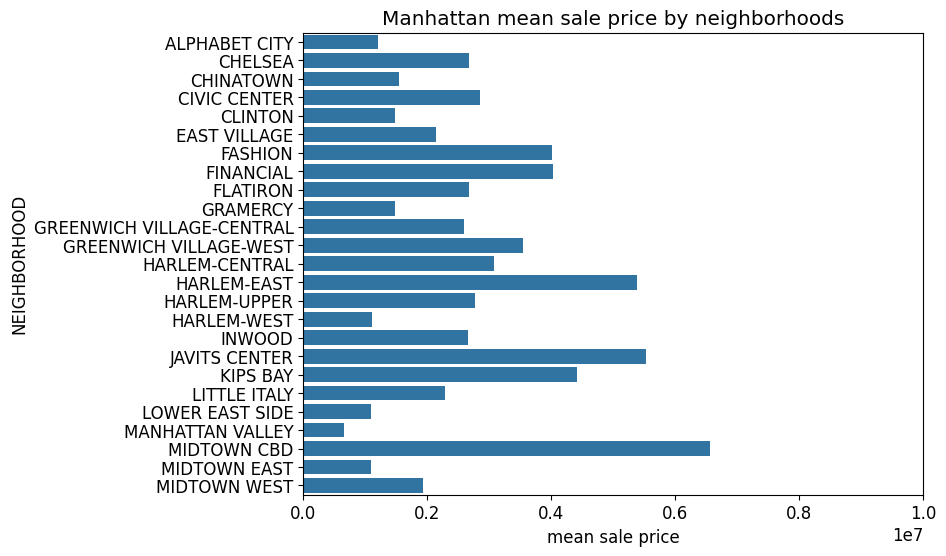

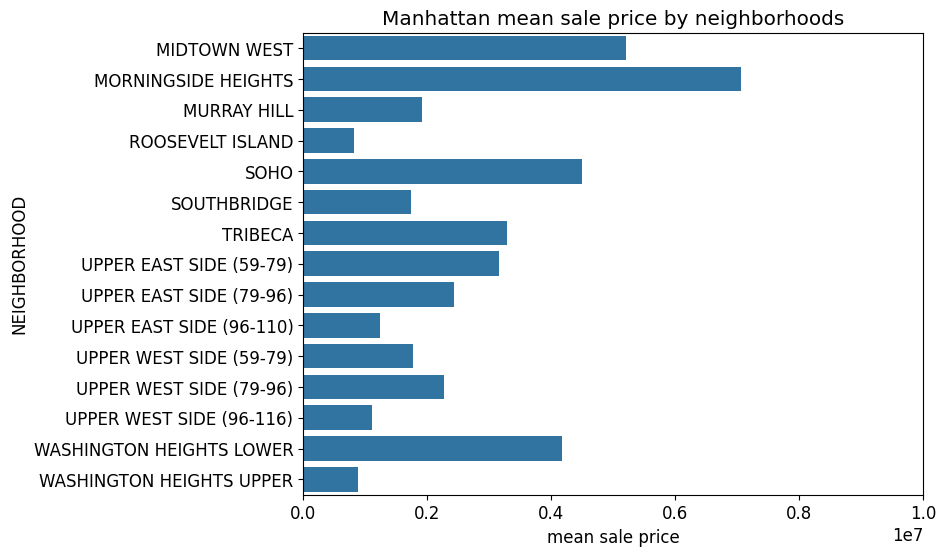

In [22]:
dfManhattanNeighborhoodsMeanSalePrice = dfManhattanFirstHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index(name = 'mean sale price')
dfManhattanNeighborhoodsMeanSalePrice =  sns.barplot(x='mean sale price', y= 'NEIGHBORHOOD', data=dfManhattanNeighborhoodsMeanSalePrice)
dfManhattanNeighborhoodsMeanSalePrice.set(title = 'Manhattan mean sale price by neighborhoods')
dfManhattanNeighborhoodsMeanSalePrice.set_xlim(0, 10000000)
plt.show()
dfManhattanNeighborhoodsMeanSalePrice = dfManhattanSecondHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index(name = 'mean sale price')
dfManhattanNeighborhoodsMeanSalePrice =  sns.barplot(x='mean sale price', y= 'NEIGHBORHOOD', data=dfManhattanNeighborhoodsMeanSalePrice)
dfManhattanNeighborhoodsMeanSalePrice.set(title = 'Manhattan mean sale price by neighborhoods')
dfManhattanNeighborhoodsMeanSalePrice.set_xlim(0, 10000000)
plt.show()

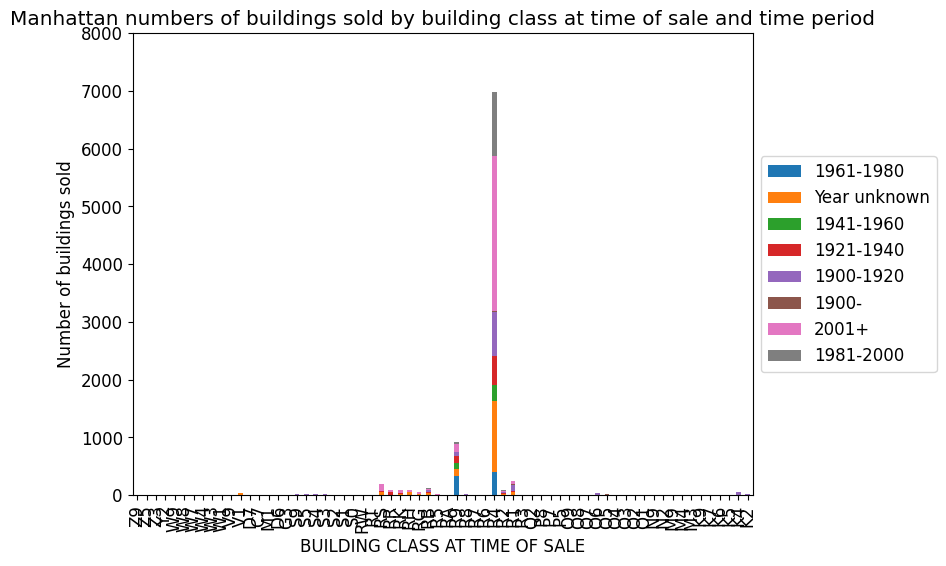

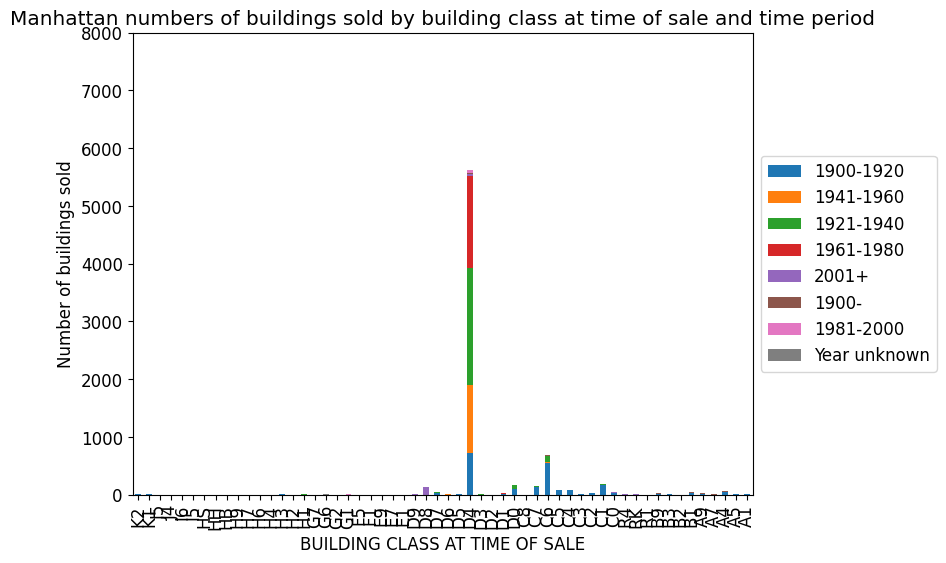

In [23]:
dfManhattanSorted = dfManhattan.sort_values(by = ['BUILDING CLASS AT PRESENT'], ascending=False)
dfManhattanSortedFirstHalf = dfManhattanSorted.head(9256).reset_index()
dfManhattanSortedSecondHalf = dfManhattanSorted.tail(len(dfManhattanSorted.index) - 9256).reset_index()
dfManhattanNeighborhoodsSizeByTimePeriod = dfManhattanSortedFirstHalf.groupby(['BUILDING CLASS AT TIME OF SALE', 'TIME PERIOD'], sort = False).size().unstack().plot(kind='bar', stacked=True)
dfManhattanNeighborhoodsSizeByTimePeriod.set(title = 'Manhattan numbers of buildings sold by building class at time of sale and time period')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfManhattanNeighborhoodsSizeByTimePeriod.set_ylim(0, 8000)
plt.show()
dfManhattanNeighborhoodsSizeByTimePeriod = dfManhattanSortedSecondHalf.groupby(['BUILDING CLASS AT TIME OF SALE', 'TIME PERIOD'], sort = False).size().unstack().plot(kind='bar', stacked=True)
dfManhattanNeighborhoodsSizeByTimePeriod.set(title = 'Manhattan numbers of buildings sold by building class at time of sale and time period')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfManhattanNeighborhoodsSizeByTimePeriod.set_ylim(0, 8000)
plt.show()

Щодо класів будівель, на сьогоднішній день популярні класи R4, R9, D8 та RS, в той час як D4 більше не продається.

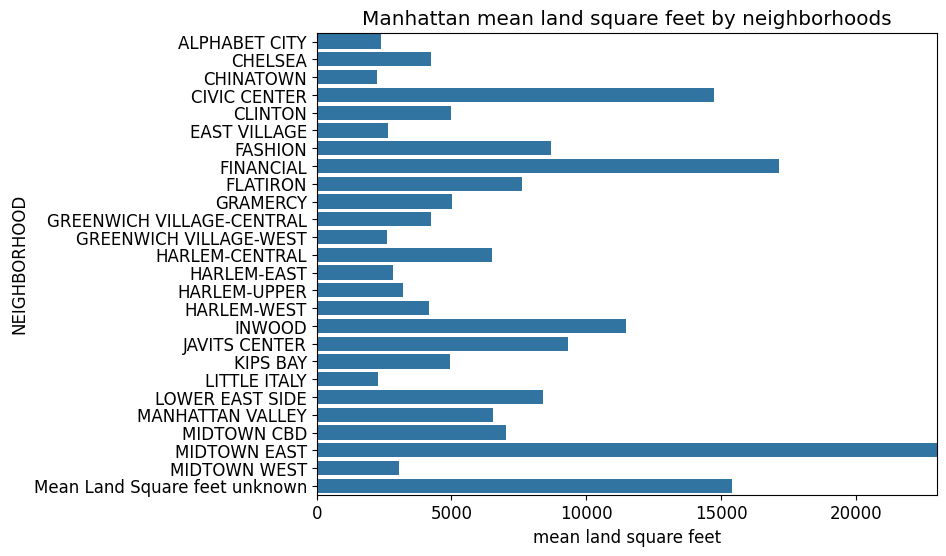

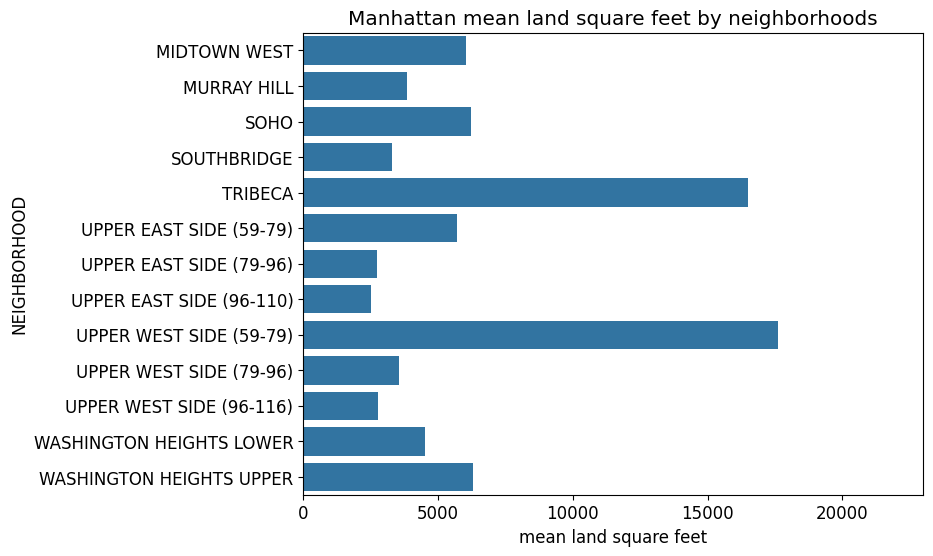

In [24]:
indexLandSquareFeetWholeArray = dfManhattan[ (dfManhattan['LAND SQUARE FEET']=='Land square feet is unknown')].index
indexLandSquareFeet = dfManhattanFirstHalf[ (dfManhattanFirstHalf['LAND SQUARE FEET']=='Land square feet is unknown')].index
dfManhattanFirstHalf.drop(indexLandSquareFeet , inplace=True)
dfManhattanNeighborhoodsMeanSalePrice = dfManhattanFirstHalf.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].mean().reset_index(name = 'mean land square feet')
new_row = pd.DataFrame({'NEIGHBORHOOD': ['Mean Land Square feet unknown'], 'mean land square feet': [len(indexLandSquareFeetWholeArray)]})
dfManhattanNeighborhoodsMeanSalePrice = pd.concat([dfManhattanNeighborhoodsMeanSalePrice, new_row], ignore_index=True)
dfManhattanNeighborhoodsMeanSalePrice =  sns.barplot(x='mean land square feet', y= 'NEIGHBORHOOD', data=dfManhattanNeighborhoodsMeanSalePrice)
dfManhattanNeighborhoodsMeanSalePrice.set(title = 'Manhattan mean land square feet by neighborhoods')
dfManhattanNeighborhoodsMeanSalePrice.set_xlim(0, 23000)
plt.show()
indexLandSquareFeet = dfManhattanSecondHalf[ (dfManhattanSecondHalf['LAND SQUARE FEET']=='Land square feet is unknown')].index
dfManhattanDropped = dfManhattanSecondHalf.drop(indexLandSquareFeet , inplace=True)
dfManhattanNeighborhoodsMeanSalePrice = dfManhattanSecondHalf.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].mean().reset_index(name = 'mean land square feet')
dfManhattanNeighborhoodsMeanSalePrice =  sns.barplot(x='mean land square feet', y= 'NEIGHBORHOOD', data=dfManhattanNeighborhoodsMeanSalePrice)
dfManhattanNeighborhoodsMeanSalePrice.set(title = 'Manhattan mean land square feet by neighborhoods')
dfManhattanNeighborhoodsMeanSalePrice.set_xlim(0, 23000)
plt.show()

для більшості районів характерний попит на житлові площі від 0 до 10,000 м^2, за винятком окремих районів, де площі перевищують 15,000 м^2.

Взагальному про Манхетен

Манхеттен має високу середню ціну нерухомості у районах Мідтаун Вест, Файненшиал та Кіпс Бей, а також високі показники продажів. Це робить Манхеттен дуже привабливим для нових інвестицій у нерухомість. Якщо буде прийняте рішення про інвестицію, то найбільш вигідними класами будівель для цього можуть бути R4, R9 та D4.

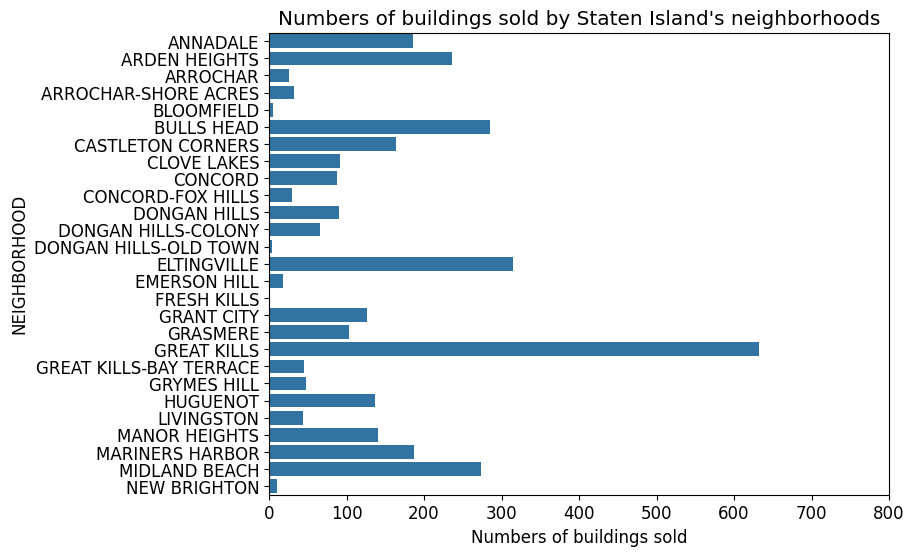

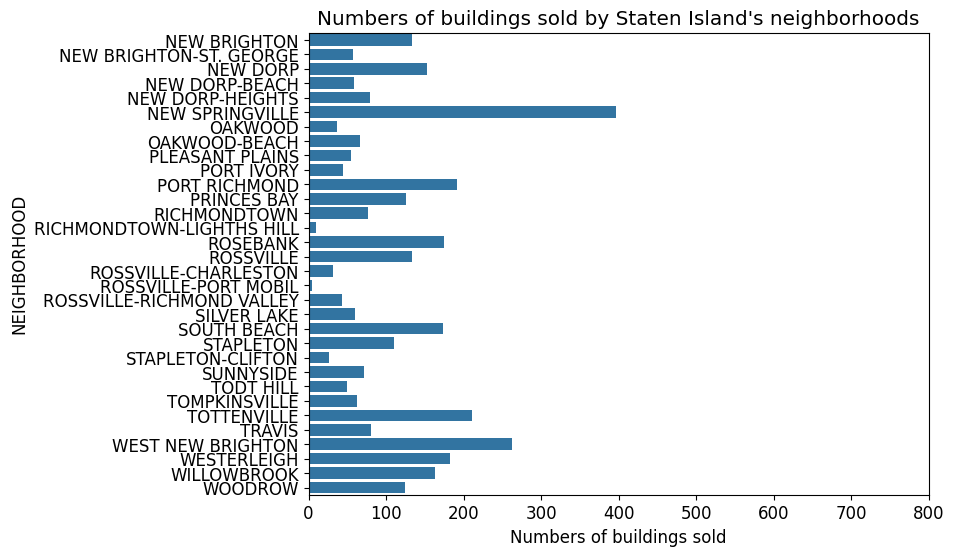

In [25]:
#Staten Island
dfStatenIsland = df.loc[df["BOROUGH"]=='Staten Island']
dfStatenIslandFirstHalf = dfStatenIsland.head(3382)
dfStatenIslandSecondHalf = dfStatenIsland.tail(len(dfStatenIsland) - 3382)
dfStatenIslandNeighborhoodsSize = dfStatenIslandFirstHalf.groupby('NEIGHBORHOOD').size().reset_index(name = 'Numbers of buildings sold')
dfStatenIslandNeighborhoodsSize =  sns.barplot(x='Numbers of buildings sold', y= 'NEIGHBORHOOD', data=dfStatenIslandNeighborhoodsSize)
dfStatenIslandNeighborhoodsSize.set(title = 'Numbers of buildings sold by Staten Island\'s neighborhoods')
dfStatenIslandNeighborhoodsSize.set_xlim(0, 800)
plt.show()
dfStatenIslandNeighborhoodsSize = dfStatenIslandSecondHalf.groupby('NEIGHBORHOOD').size().reset_index(name = 'Numbers of buildings sold')
dfStatenIslandNeighborhoodsSize =  sns.barplot(x='Numbers of buildings sold', y= 'NEIGHBORHOOD', data=dfStatenIslandNeighborhoodsSize)
dfStatenIslandNeighborhoodsSize.set(title = 'Numbers of buildings sold by Staten Island\'s neighborhoods')
dfStatenIslandNeighborhoodsSize.set_xlim(0, 800)
plt.show()

На графіках помітно, що найвищий обсяг продажів нерухомості зафіксовано в Ґрейт Кілс, Нью Спрінґвіл та Елтінґвіл. Проте, аналіз другого графіка показує, що багато об'єктів у цих районах було продано до 2001 року, а попит на нерухомість у Тутенвіл, Вест Нью Брайтон, Вудроу та Еннадейл продовжує зростати зараз.

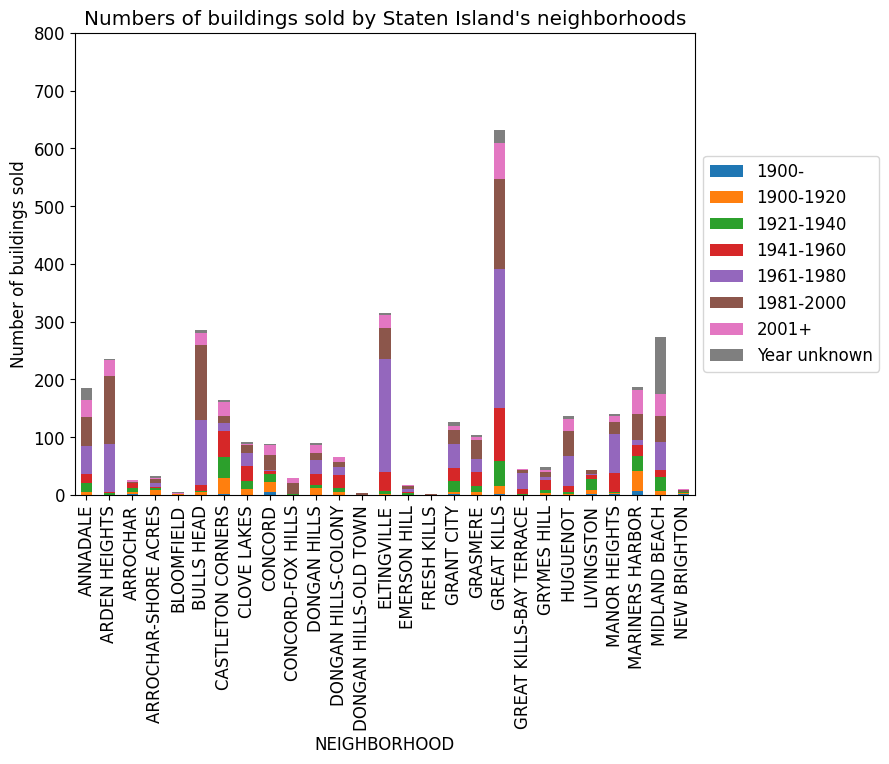

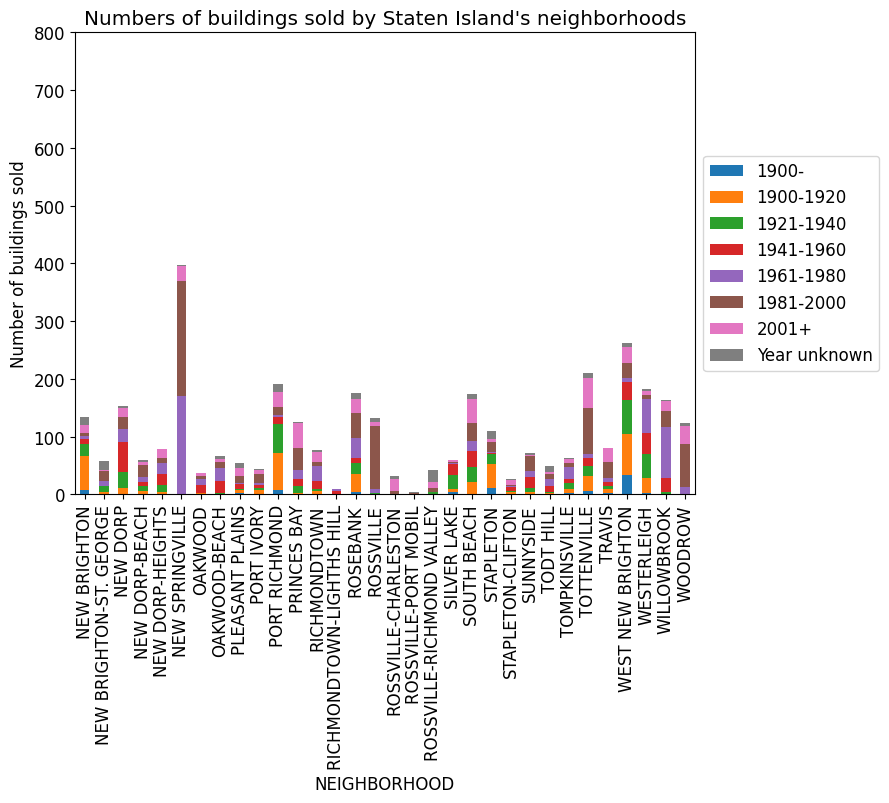

In [26]:
dfStatenIslandNeighborhoodsSizeByTimePeriod = dfStatenIslandFirstHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfStatenIslandNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Staten Island\'s neighborhoods')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfStatenIslandNeighborhoodsSizeByTimePeriod.set_ylim(0, 800)
plt.show()
dfStatenIslandNeighborhoodsSizeByTimePeriod = dfStatenIslandSecondHalf.groupby(['NEIGHBORHOOD', 'TIME PERIOD']).size().unstack().plot(kind='bar', stacked=True)
dfStatenIslandNeighborhoodsSizeByTimePeriod.set(title = 'Numbers of buildings sold by Staten Island\'s neighborhoods')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfStatenIslandNeighborhoodsSizeByTimePeriod.set_ylim(0, 800)
plt.show()

Щодо років з 1961 по 2000, будівлі цього періоду користувалися значним попитом, але починаючи з 2001 року спостерігається гострий спад.

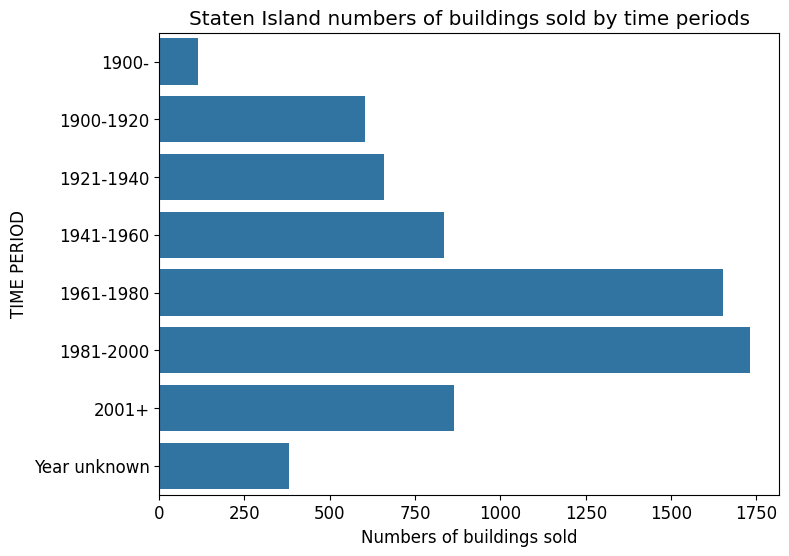

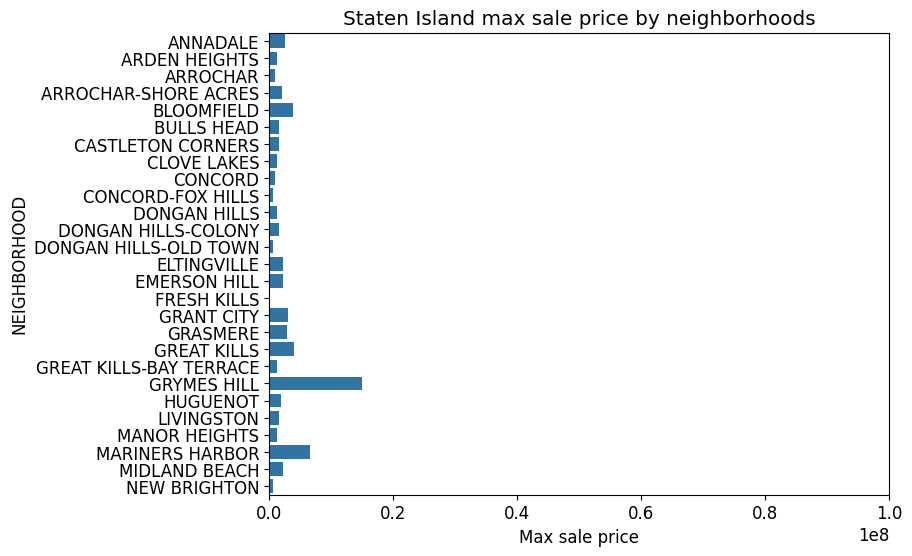

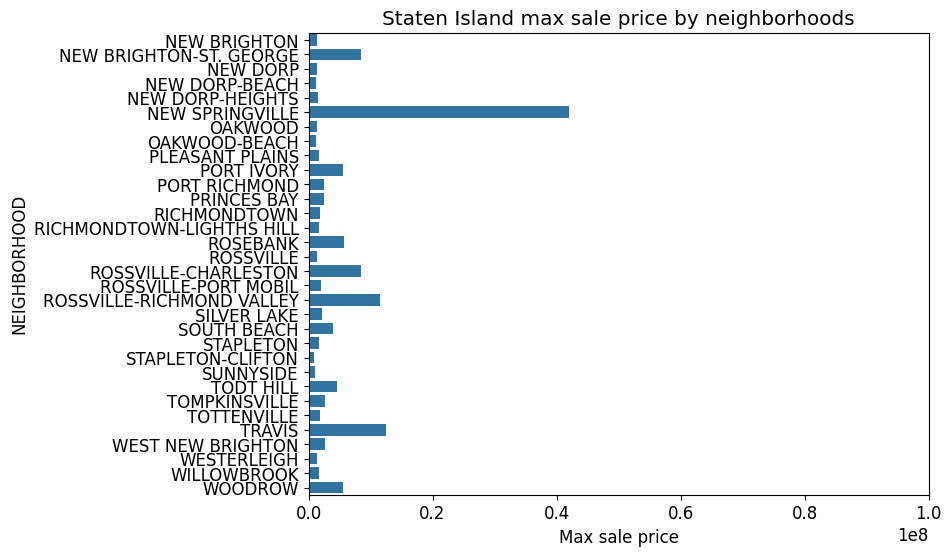

In [27]:
dfStatenIslandNeighborhoodsTimePeriod = dfStatenIsland.groupby('TIME PERIOD')['NEIGHBORHOOD'].size().reset_index(name = 'Numbers of buildings sold')
dfStatenIslandNeighborhoodsTimePeriod =  sns.barplot(x='Numbers of buildings sold', y= 'TIME PERIOD', data=dfStatenIslandNeighborhoodsTimePeriod)
dfStatenIslandNeighborhoodsTimePeriod.set(title = 'Staten Island numbers of buildings sold by time periods')
plt.show()
dfStatenIslandNeighborhoodsMaxSalePrice = dfStatenIslandFirstHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].max().reset_index(name = 'Max sale price')
dfStatenIslandNeighborhoodsMaxSalePrice =  sns.barplot(x='Max sale price', y= 'NEIGHBORHOOD', data=dfStatenIslandNeighborhoodsMaxSalePrice)
dfStatenIslandNeighborhoodsMaxSalePrice.set(title = 'Staten Island max sale price by neighborhoods')
dfStatenIslandNeighborhoodsMaxSalePrice.set_xlim(0, 100000000)
plt.show()
dfStatenIslandNeighborhoodsMaxSalePrice = dfStatenIslandSecondHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].max().reset_index(name = 'Max sale price')
dfStatenIslandNeighborhoodsMaxSalePrice =  sns.barplot(x='Max sale price', y= 'NEIGHBORHOOD', data=dfStatenIslandNeighborhoodsMaxSalePrice)
dfStatenIslandNeighborhoodsMaxSalePrice.set(title = 'Staten Island max sale price by neighborhoods')
dfStatenIslandNeighborhoodsMaxSalePrice.set_xlim(0, 100000000)
plt.show()

Найвища ціна продажу визначена у Нью Спрінґвіл (близько 5,500,000 доларів), проте середня ціна у цьому районі схожа до більшості інших районів. Значимі залишаються Росвіл-Річмонд Волі, Нью Брайтон-Сейнт Джордж та Росвіл-Порт Мобіл з високими середніми цінами.

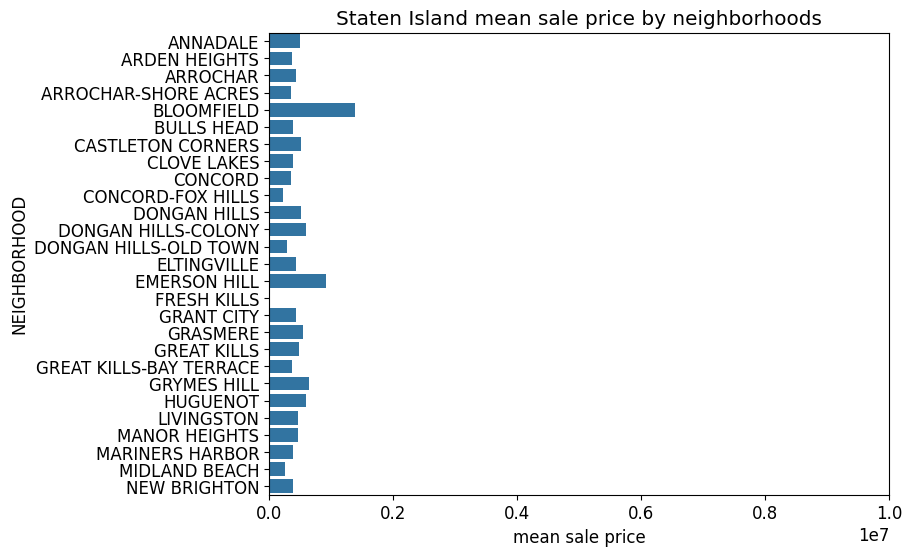

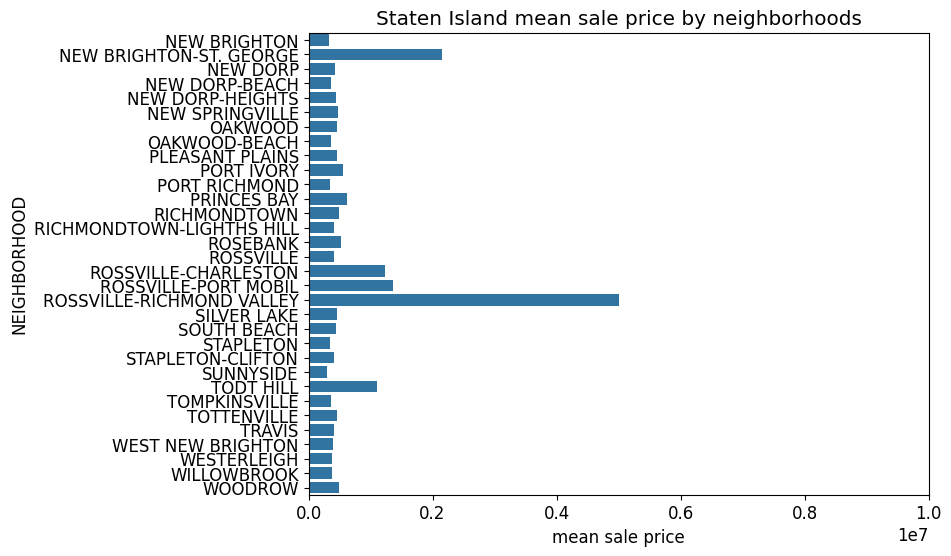

In [28]:
dfStatenIslandNeighborhoodsMeanSalePrice = dfStatenIslandFirstHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index(name = 'mean sale price')
dfStatenIslandNeighborhoodsMeanSalePrice =  sns.barplot(x='mean sale price', y= 'NEIGHBORHOOD', data=dfStatenIslandNeighborhoodsMeanSalePrice)
dfStatenIslandNeighborhoodsMeanSalePrice.set(title = 'Staten Island mean sale price by neighborhoods')
dfStatenIslandNeighborhoodsMeanSalePrice.set_xlim(0, 10000000)
plt.show()
dfStatenIslandNeighborhoodsMeanSalePrice = dfStatenIslandSecondHalf.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index(name = 'mean sale price')
dfStatenIslandNeighborhoodsMeanSalePrice =  sns.barplot(x='mean sale price', y= 'NEIGHBORHOOD', data=dfStatenIslandNeighborhoodsMeanSalePrice)
dfStatenIslandNeighborhoodsMeanSalePrice.set(title = 'Staten Island mean sale price by neighborhoods')
dfStatenIslandNeighborhoodsMeanSalePrice.set_xlim(0, 10000000)
plt.show()

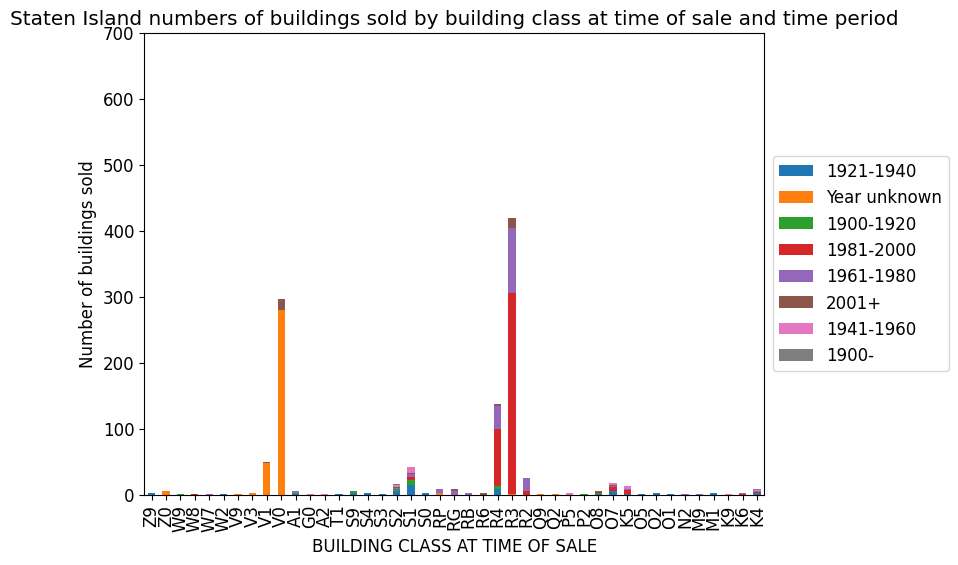

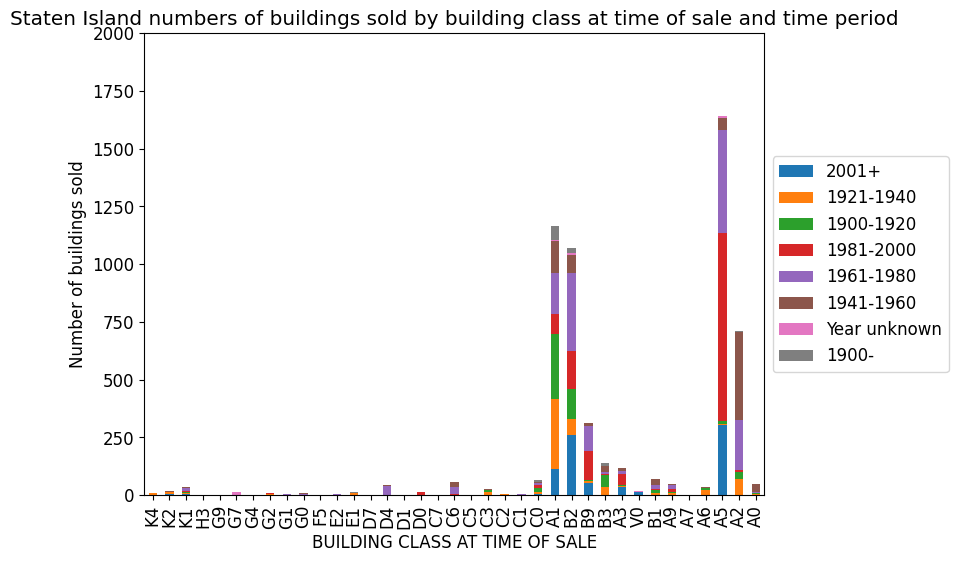

In [29]:
dfStatenIslandSorted = dfStatenIsland.sort_values(by = ['BUILDING CLASS AT PRESENT'], ascending=False)
dfStatenIslandSortedFirstHalf = dfStatenIslandSorted.head(1104).reset_index()
dfStatenIslandSortedSecondHalf = dfStatenIslandSorted.tail(len(dfStatenIslandSorted.index) - 1104).reset_index()
dfStatenIslandNeighborhoodsSizeByTimePeriod = dfStatenIslandSortedFirstHalf.groupby(['BUILDING CLASS AT TIME OF SALE', 'TIME PERIOD'], sort = False).size().unstack().plot(kind='bar', stacked=True)
dfStatenIslandNeighborhoodsSizeByTimePeriod.set(title = 'Staten Island numbers of buildings sold by building class at time of sale and time period')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfStatenIslandNeighborhoodsSizeByTimePeriod.set_ylim(0, 700)
plt.show()
dfStatenIslandNeighborhoodsSizeByTimePeriod = dfStatenIslandSortedSecondHalf.groupby(['BUILDING CLASS AT TIME OF SALE', 'TIME PERIOD'], sort = False).size().unstack().plot(kind='bar', stacked=True)
dfStatenIslandNeighborhoodsSizeByTimePeriod.set(title = 'Staten Island numbers of buildings sold by building class at time of sale and time period')
plt.ylabel('Number of buildings sold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
dfStatenIslandNeighborhoodsSizeByTimePeriod.set_ylim(0, 2000)
plt.show()

на сьогоднішній день популярні класи A1, A5, B2, з особливим попитом на клас A5.

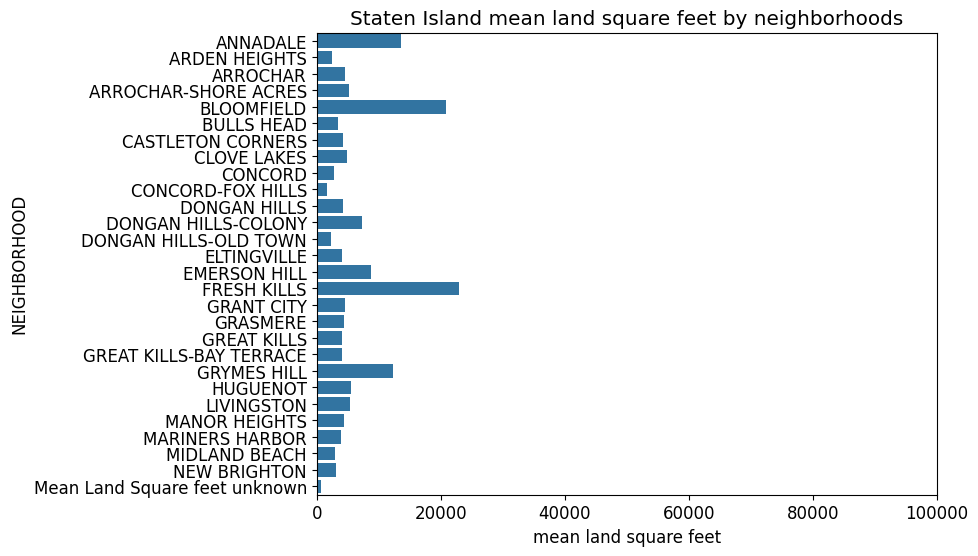

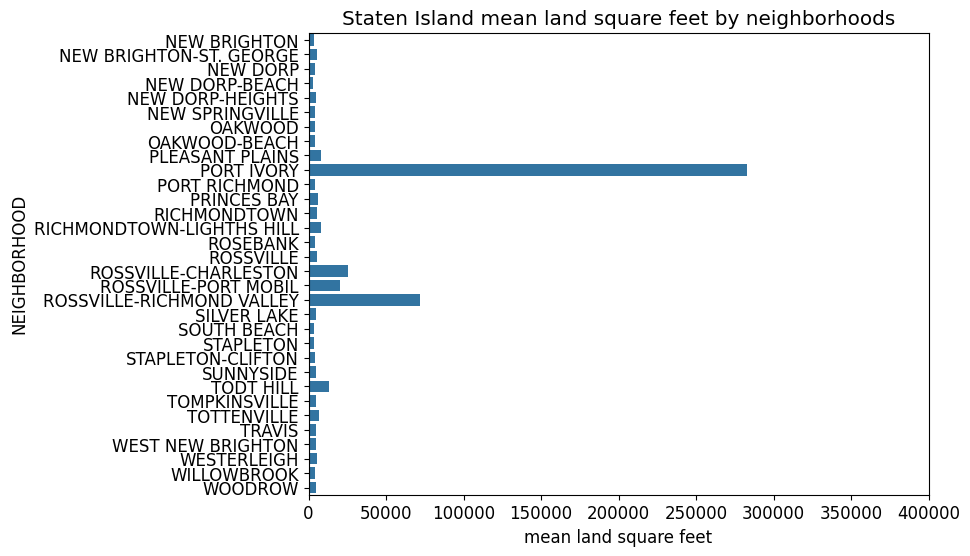

In [30]:
indexLandSquareFeetWholeArray = dfStatenIsland[ (dfStatenIsland['LAND SQUARE FEET']=='Land square feet is unknown')].index
indexLandSquareFeet = dfStatenIslandFirstHalf[ (dfStatenIslandFirstHalf['LAND SQUARE FEET']=='Land square feet is unknown')].index
dfStatenIslandFirstHalf.drop(indexLandSquareFeet , inplace=True)
dfStatenIslandNeighborhoodsMeanSalePrice = dfStatenIslandFirstHalf.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].mean().reset_index(name = 'mean land square feet')
new_row = pd.DataFrame({'NEIGHBORHOOD': ['Mean Land Square feet unknown'], 'mean land square feet': [len(indexLandSquareFeetWholeArray)]})
dfStatenIslandNeighborhoodsMeanSalePrice = pd.concat([dfStatenIslandNeighborhoodsMeanSalePrice, new_row], ignore_index=True)
dfStatenIslandNeighborhoodsMeanSalePrice =  sns.barplot(x='mean land square feet', y= 'NEIGHBORHOOD', data=dfStatenIslandNeighborhoodsMeanSalePrice)
dfStatenIslandNeighborhoodsMeanSalePrice.set(title = 'Staten Island mean land square feet by neighborhoods')
dfStatenIslandNeighborhoodsMeanSalePrice.set_xlim(0, 100000)
plt.show()
indexLandSquareFeet = dfStatenIslandSecondHalf[ (dfStatenIslandSecondHalf['LAND SQUARE FEET']=='Land square feet is unknown')].index
dfStatenIslandDropped = dfStatenIslandSecondHalf.drop(indexLandSquareFeet , inplace=True)
dfStatenIslandNeighborhoodsMeanSalePrice = dfStatenIslandSecondHalf.groupby('NEIGHBORHOOD')['LAND SQUARE FEET'].mean().reset_index(name = 'mean land square feet')
dfStatenIslandNeighborhoodsMeanSalePrice =  sns.barplot(x='mean land square feet', y= 'NEIGHBORHOOD', data=dfStatenIslandNeighborhoodsMeanSalePrice)
dfStatenIslandNeighborhoodsMeanSalePrice.set(title = 'Staten Island mean land square feet by neighborhoods')
dfStatenIslandNeighborhoodsMeanSalePrice.set_xlim(0, 400000)
plt.show()

У більшості районів попитом є житлові площі від 0 до 30,000 м^2, але в Росвіл-Річмонд Воллі середня площа перевищує 70,000 м^2. А в порт айворі взагалі космічні  280,000 м^2

В загальному про Стейтен Айленд

Стейтен Айленд має середню ціну нерухомості лише в Росвіл-Річмонд Волі, низьку у всіх інших районах та середні показники продажів. Рекомендується розглядати цю нерухомість для інвестицій лише у випадку вкладання коштів у район Росвіл-Річмонд Волі. У разі інвестування рекомендовані класи будівель: R4, A5 та B2.

З аналізу графіків випливає, що Бруклін та Манхеттен є особливо привабливими областями для інвестицій. Нерухомість в обидвох на сьогоднішній день відзначаються високим попитом і високим середнім рівнем цін. Варто зауважити, що у всіх районах, крім Стейтен Айленд, клас будівель R4 є найбільш популярним. Клас D4 користувався великим попитом до 2001 року, але після цього відзначився значним зниженням продажів. У Стейтен Айленд наибільш популярними класами будівель є A1, A5 та B2. Отже, ці райони представляють перспективи для успішних інвестицій у нерухомість.